# PRÁCTICA MACHINE LEARNING 101 
### C. JAVIER ÁVILA BERMEJO
En esta práctica se muestra el proceso para cargar, tratar y el modelado un dataset de airbnb con el objetivo de predecir el precio de un piso en madrid a partir de una serie de variables y un modelo de machine learining

In [1]:
#Librerías utilizadas
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import statistics as stat
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn import preprocessing
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
#Carga de los datos a utilizar en la práctica
#Plantamos una semilla para reproducir los resultados obtenidos
np.random.seed(0)
full_data = pd.read_csv('./airbnb-listings-extract.csv', sep =';', decimal='.')

#Dividimos train y test
data, test = train_test_split(full_data, test_size=0.3, shuffle=True, random_state=0)
#Guardamos en dos ficheros separados
data.to_csv('./data.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

In [3]:
#Cargamos los datos de train
data = pd.read_csv('./data.csv', sep=';', decimal='.')

## Preprocesamiento

Después de revisar el csv se eliminan las columnas que no van a formar parte del modelo por contener mucha información textual (complicando el análisis) o por no tener información de interés para el modelo(ejemplo, urls). También se eliminan las columnas que se estén estrechamente relacionadas con otras de forma obvia (ejemplo, la columna geolocalización = las columnas de latitud y logitud)

In [4]:
data.drop(['ID','Listing Url','Scrape ID','Last Scraped','Name',
           'Summary','Space','Description','Neighborhood Overview',
           'Notes','Transit','Access','Interaction','House Rules',
           'Thumbnail Url','Medium Url','Picture Url','XL Picture Url',
           'Host ID','Host URL','Host Name','Host Since','Host Location',
           'Host About','Host Response Time','Host Thumbnail Url',
           'Host Picture Url','Neighbourhood','Market','Smart Location',
           'Country Code','State','Calendar Updated','Calendar last Scraped',
           'First Review','Last Review','License','Jurisdiction Names',
           'Geolocation', 'Host Neighbourhood', 'Features'], axis = 1, inplace = True)

In [5]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,10336,10337,10338,10339,10340,10341,10342,10343,10344,10345
Experiences Offered,none,none,none,none,none,none,none,none,none,none,...,none,none,none,none,none,none,none,none,none,none
Host Response Rate,100.0,100.0,100.0,NaN,NaN,100.0,100.0,NaN,100.0,100.0,...,100.0,100.0,95.0,100.0,NaN,100.0,100.0,100.0,100.0,100.0
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Listings Count,40.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,8.0,1.0,...,1.0,6.0,4.0,5.0,1.0,1.0,2.0,1.0,1.0,14.0
Host Total Listings Count,40.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,8.0,1.0,...,1.0,6.0,4.0,5.0,1.0,1.0,2.0,1.0,1.0,14.0
Host Verifications,"email,phone,reviews,jumio","email,phone,reviews,manual_offline,jumio","email,phone,reviews,jumio,government_id","email,phone,reviews","email,phone","email,phone,reviews,work_email","email,phone,facebook,reviews,jumio,offline_gov...","email,phone","email,phone,reviews,manual_offline","email,phone,reviews",...,"email,phone,reviews,jumio,work_email","email,phone,facebook,reviews,jumio","email,phone,facebook","email,phone,reviews,jumio,government_id","email,phone,reviews,jumio","email,phone,google,jumio,offline_government_id...","email,phone,reviews,manual_offline,jumio","email,phone,linkedin,reviews,jumio,government_id","email,phone,reviews","email,phone,reviews,jumio"
Street,"Sol, Madrid, Community of Madrid 28013, Spain","La Latina, Madrid, Comunidad de Madrid 28005, ...","Madrid, Comunidad de Madrid 28006, Spain","Carabanchel, Madrid, Comunidad de Madrid 28019...","Imperial, Madrid, Comunidad de Madrid 28005, S...","Madrid, Community of Madrid, Spain","Ciudad Lineal, Madrid, Comunidad de Madrid 280...","Madrid, Comunidad de Madrid 28042, Spain","Saint-Germain-des-Prés - Odéon, Paris, Île-de-...","Ciudad Lineal, Madrid, Comunidad de Madrid 280...",...,"Palma, PM 07015, Spain","La Latina, Madrid, Madrid 28012, Spain","Madrid, Comunidad de Madrid 28013, Spain","Acacias, Madrid, Comunidad de Madrid 28005, Spain","Argüelles, Madrid, Community of Madrid 28008, ...","Argüelles, Madrid, Comunidad de Madrid 28008, ...","Aluche, Madrid, Comunidad de Madrid 28047, Spain","Madrid, Comunidad de Madrid 28013, Spain","La Latina, Madrid, Comunidad de Madrid 28005, ...","Madrid, Comunidad de Madrid 28001, Spain"
Neighbourhood Cleansed,Sol,Embajadores,Goya,Comillas,Imperial,Goya,Pueblo Nuevo,Timón,Palais-Bourbon,Quintana,...,Palma de Mallorca,Embajadores,Universidad,Acacias,Casa de Campo,Argüelles,Aluche,Palacio,Palacio,Lista
Neighbourhood Group Cleansed,Centro,Centro,Salamanca,Carabanchel,Arganzuela,Salamanca,Ciudad Lineal,Barajas,NaN,Ciudad Lineal,...,NaN,Centro,Centro,Arganzuela,Moncloa - Aravaca,Moncloa - Aravaca,Latina,Centro,Centro,Salamanca
City,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Paris,Madrid,...,Palma,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid


El siguiente paso es eliminar todos los datos que no pertenezcan a Madrid, para ello vamos a utilizar las columnas Country y City

In [6]:
data= data[data['Country']=='Spain']
data= data[data['City']=='Madrid']
print(data['Country'].unique())
print(data['City'].unique())
print(data.shape)
data.head().T

['Spain']
['Madrid']
(9249, 48)


,0,1,2,3,4
Experiences Offered,none,none,none,none,none
Host Response Rate,100.0,100.0,100.0,NaN,NaN
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Listings Count,40.0,1.0,3.0,1.0,4.0
Host Total Listings Count,40.0,1.0,3.0,1.0,4.0
Host Verifications,"email,phone,reviews,jumio","email,phone,reviews,manual_offline,jumio","email,phone,reviews,jumio,government_id","email,phone,reviews","email,phone"
Street,"Sol, Madrid, Community of Madrid 28013, Spain","La Latina, Madrid, Comunidad de Madrid 28005, ...","Madrid, Comunidad de Madrid 28006, Spain","Carabanchel, Madrid, Comunidad de Madrid 28019...","Imperial, Madrid, Comunidad de Madrid 28005, S..."
Neighbourhood Cleansed,Sol,Embajadores,Goya,Comillas,Imperial
Neighbourhood Group Cleansed,Centro,Centro,Salamanca,Carabanchel,Arganzuela
City,Madrid,Madrid,Madrid,Madrid,Madrid


A continuación se analiza la cantidad de NAs por columna para valorar si se puede realizar una imputación o directamente se eliminan por la falta de data.

In [7]:
for column in range(0, data.shape[1]):
    tasa_na = round((data[data.columns.values[column]].isnull().sum()/data.shape[0])*100, 2)
    print(f'La tasa de NAs es de {data.columns.values[column]} es: {tasa_na}%')

La tasa de NAs es de Experiences Offered es: 0.0%
La tasa de NAs es de Host Response Rate es: 12.51%
La tasa de NAs es de Host Acceptance Rate es: 100.0%
La tasa de NAs es de Host Listings Count es: 0.02%
La tasa de NAs es de Host Total Listings Count es: 0.02%
La tasa de NAs es de Host Verifications es: 0.04%
La tasa de NAs es de Street es: 0.0%
La tasa de NAs es de Neighbourhood Cleansed es: 0.0%
La tasa de NAs es de Neighbourhood Group Cleansed es: 0.0%
La tasa de NAs es de City es: 0.0%
La tasa de NAs es de Zipcode es: 3.29%
La tasa de NAs es de Country es: 0.0%
La tasa de NAs es de Latitude es: 0.0%
La tasa de NAs es de Longitude es: 0.0%
La tasa de NAs es de Property Type es: 0.0%
La tasa de NAs es de Room Type es: 0.0%
La tasa de NAs es de Accommodates es: 0.0%
La tasa de NAs es de Bathrooms es: 0.38%
La tasa de NAs es de Bedrooms es: 0.19%
La tasa de NAs es de Beds es: 0.37%
La tasa de NAs es de Bed Type es: 0.0%
La tasa de NAs es de Amenities es: 0.89%
La tasa de NAs es de Squ

Según los resultados se eliminan las columnas Host Acceptance Rate, Square Feet, Has Availability. También se eliminan Weekly Price y Monthly Price, por los NAs que tiene y al contextualizar los datos se entiende que tienen un relación con Price

In [8]:
data.drop(['Host Acceptance Rate', 
           'Has Availability',
           'Weekly Price',
           'Square Feet',
           'Monthly Price'], axis = 1, inplace = True)

In [9]:
data.head().T

,0,1,2,3,4
Experiences Offered,none,none,none,none,none
Host Response Rate,100.0,100.0,100.0,NaN,NaN
Host Listings Count,40.0,1.0,3.0,1.0,4.0
Host Total Listings Count,40.0,1.0,3.0,1.0,4.0
Host Verifications,"email,phone,reviews,jumio","email,phone,reviews,manual_offline,jumio","email,phone,reviews,jumio,government_id","email,phone,reviews","email,phone"
Street,"Sol, Madrid, Community of Madrid 28013, Spain","La Latina, Madrid, Comunidad de Madrid 28005, ...","Madrid, Comunidad de Madrid 28006, Spain","Carabanchel, Madrid, Comunidad de Madrid 28019...","Imperial, Madrid, Comunidad de Madrid 28005, S..."
Neighbourhood Cleansed,Sol,Embajadores,Goya,Comillas,Imperial
Neighbourhood Group Cleansed,Centro,Centro,Salamanca,Carabanchel,Arganzuela
City,Madrid,Madrid,Madrid,Madrid,Madrid
Zipcode,28013,28005,28006,28019,28005


El siguiente paso es analizar el dataset, para eliminar variables que no tienen impacto por falta de variabilidad.

In [10]:
data['Experiences Offered'].unique()

array(['none'], dtype=object)

El no tener más de un solo valor no aporta información diferencial entre los pisos, por lo tanto no tendrá impacto en el modelo al ser constante, se puede eliminar esta columna. También incluimos City y Country que habíamos filtrado a Madrid y Spain, respectivamente

In [11]:
data.drop(['Experiences Offered', 'Country', 'City'], axis = 1, inplace = True)

In [12]:
data['Host Verifications'].head()

0                   email,phone,reviews,jumio
1    email,phone,reviews,manual_offline,jumio
2     email,phone,reviews,jumio,government_id
3                         email,phone,reviews
4                                 email,phone
Name: Host Verifications, dtype: object

En este caso, nos encontramos un listado de las verificaciones realizadas por el anfitrión, puede ser interesante la cantidad de veces que sea verificado, pero, de nuevo, para simplificar el modelo vamos a recodificar con 0 y 1, siendo cero = NA y 1 distinto a NA.

In [13]:
data['Host Verifications'] = data['Host Verifications'].apply(lambda x: 0 if (pd.isnull(x)) else 1)
data['Host Verifications'].unique()

array([1, 0])

In [14]:
data['Street'].unique()[:5]

array(['Sol, Madrid, Community of Madrid 28013, Spain',
       'La Latina, Madrid, Comunidad de Madrid 28005, Spain',
       'Madrid, Comunidad de Madrid 28006, Spain',
       'Carabanchel, Madrid, Comunidad de Madrid 28019, Spain',
       'Imperial, Madrid, Comunidad de Madrid 28005, Spain'], dtype=object)

Como podemos ver, Street es un campo sin estructura y que aglutina información ya relacionada en otras columnas como por ejemplo Zipcode, city, Neighbourhood Cleansed, Country, por lo tanto es irrelevante, también se elimina.

In [15]:
data.drop(['Street'], axis = 1, inplace = True)

In [16]:
data['Amenities'].unique()

array(['TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Smoking allowed,Pets allowed,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials',
       'Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace',
       'TV,Wireless Internet,Kitchen,Smoking allowed,Elevator in building,Heating,Family/kid friendly,Essentials,Shampoo,translation missing: en.hosting_amenity_50',
       ...,
       'TV,Internet,Wireless Internet,Kitchen,Breakfast,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,First aid kit,Safety card,Essentials,Shampoo,Hangers,Iron,Laptop friendly workspace',
       'TV,Cable TV,Wireless Internet,Kitchen,Buzzer/wireless intercom,Heating,Washer,Smoke detector,C

En este caso, tenemos un campo de las ventajas de cada piso, vamos a transformar estás variables para que aporten un valor según el número ventajas indistintamente del tipo de forma logaritmica y sumando 1 para tener el valor 0

In [17]:
data['Amenities'] = data['Amenities'].apply(lambda x: 0 if (pd.isnull(x)) else math.log(x.count(',')+1))
data['Amenities'].unique()

array([2.7080502 , 2.89037176, 2.30258509, 2.19722458, 2.39789527,
       0.        , 2.77258872, 2.83321334, 2.63905733, 1.60943791,
       2.07944154, 1.38629436, 3.04452244, 1.79175947, 2.56494936,
       2.48490665, 3.17805383, 2.94443898, 1.94591015, 3.09104245,
       2.99573227, 3.36729583, 3.25809654, 3.29583687, 3.21887582,
       3.13549422, 3.4339872 , 0.69314718, 3.33220451, 1.09861229,
       3.40119738, 3.52636052, 3.4657359 ])

In [18]:
print(data['Cleaning Fee'].unique())
print(data['Security Deposit'].unique())

[ 40.  20.  nan  30.  22.  15.  60.  85.  10.   8.  50.  25.  12.  14.
  35.  65.  77.   5.  45.  80. 150.   6. 100.  90.  70.  33. 200.  36.
   9. 350.  23.  49.  18.  24.  95.  29.  26. 160.   7.  32. 115.  13.
  99.  34.  48. 250.  16.  19.  39.  37. 110.  27. 140.  55.  75.  17.
  11. 103. 375. 180.  47.  42.  28.  52.  89.  38.  58.  79. 105. 174.
 120.  41.  72. 300.  21.  59. 500.  78.  62.  53.  68.  69.  88.  94.
  73.]
[150.  99.  nan 100. 120. 300. 250.  94. 500.  85.  90. 199. 200. 400.
 175. 299.  95.  80.  96. 103. 335. 850. 900. 600. 350. 450. 295. 365.
  87. 148.  70.  75. 290. 140. 195. 170. 425. 125. 110.  88. 750. 462.
 190. 280. 700. 180.  91. 145. 650.  93. 281. 702.  86. 112. 160. 415.
 240. 130. 188. 469. 198. 117. 800. 105.  98.  97. 301. 159. 210. 220.
 399. 234. 550.  84. 166. 270.  89. 351.  92. 490. 360. 115. 113. 141.
 221. 840. 950. 525. 275. 173. 320.  76. 475. 118. 410. 330. 990.]


En estos dos casos asumimos que al no existir el 0 en ningún de los dos casos vamos suponer que los NaN = 0, es decir no tienen ni propina por limpieza ni deposito, por lo tanto igualamos a 0 las NA.

In [19]:
data['Cleaning Fee'] = data['Cleaning Fee'].apply(lambda x: 0 if (pd.isnull(x)) else x)
data['Security Deposit'] = data['Security Deposit'].apply(lambda x: 0 if (pd.isnull(x)) else x)
print(data['Cleaning Fee'].unique())
print(data['Security Deposit'].unique())

[ 40.  20.   0.  30.  22.  15.  60.  85.  10.   8.  50.  25.  12.  14.
  35.  65.  77.   5.  45.  80. 150.   6. 100.  90.  70.  33. 200.  36.
   9. 350.  23.  49.  18.  24.  95.  29.  26. 160.   7.  32. 115.  13.
  99.  34.  48. 250.  16.  19.  39.  37. 110.  27. 140.  55.  75.  17.
  11. 103. 375. 180.  47.  42.  28.  52.  89.  38.  58.  79. 105. 174.
 120.  41.  72. 300.  21.  59. 500.  78.  62.  53.  68.  69.  88.  94.
  73.]
[150.  99.   0. 100. 120. 300. 250.  94. 500.  85.  90. 199. 200. 400.
 175. 299.  95.  80.  96. 103. 335. 850. 900. 600. 350. 450. 295. 365.
  87. 148.  70.  75. 290. 140. 195. 170. 425. 125. 110.  88. 750. 462.
 190. 280. 700. 180.  91. 145. 650.  93. 281. 702.  86. 112. 160. 415.
 240. 130. 188. 469. 198. 117. 800. 105.  98.  97. 301. 159. 210. 220.
 399. 234. 550.  84. 166. 270.  89. 351.  92. 490. 360. 115. 113. 141.
 221. 840. 950. 525. 275. 173. 320.  76. 475. 118. 410. 330. 990.]


Revisemos de Nuevo los datos según NA actuales.

In [20]:
for column in range(0, data.shape[1]):
    tasa_na = round((data[data.columns.values[column]].isnull().sum()/data.shape[0])*100, 2)
    print(f'La tasa de NAs es de {data.columns.values[column]} es: {tasa_na}%')

La tasa de NAs es de Host Response Rate es: 12.51%
La tasa de NAs es de Host Listings Count es: 0.02%
La tasa de NAs es de Host Total Listings Count es: 0.02%
La tasa de NAs es de Host Verifications es: 0.0%
La tasa de NAs es de Neighbourhood Cleansed es: 0.0%
La tasa de NAs es de Neighbourhood Group Cleansed es: 0.0%
La tasa de NAs es de Zipcode es: 3.29%
La tasa de NAs es de Latitude es: 0.0%
La tasa de NAs es de Longitude es: 0.0%
La tasa de NAs es de Property Type es: 0.0%
La tasa de NAs es de Room Type es: 0.0%
La tasa de NAs es de Accommodates es: 0.0%
La tasa de NAs es de Bathrooms es: 0.38%
La tasa de NAs es de Bedrooms es: 0.19%
La tasa de NAs es de Beds es: 0.37%
La tasa de NAs es de Bed Type es: 0.0%
La tasa de NAs es de Amenities es: 0.0%
La tasa de NAs es de Price es: 0.09%
La tasa de NAs es de Security Deposit es: 0.0%
La tasa de NAs es de Cleaning Fee es: 0.0%
La tasa de NAs es de Guests Included es: 0.0%
La tasa de NAs es de Extra People es: 0.0%
La tasa de NAs es de Mi

Para terminar con el preprocesamiento del dataset, se van a eliminar variables concurrentes como Availability 30, 60 y 90, quedadonos solo con Availabilitu 365 y transformandola en la tasa anual de disponibilidad.
También se eliminar la variable Reviwes per Month, por ser un agredado de la Review Score.

In [21]:
data.drop(['Availability 30',
           'Availability 60',
           'Availability 90',
           'Reviews per Month'], axis = 1, inplace = True)
data['Availability 365'] = data['Availability 365'].apply(lambda x: x/365)

Cambiamos el nombre de las variables modificadas

In [22]:
data.rename(columns = {'Availability 365':'Availability Rate', 'Amenities':'Log Number Amenities'}, inplace=True)

In [23]:
for column in range(0, data.shape[1]):
    tasa_na = round((data[data.columns.values[column]].isnull().sum()/data.shape[0])*100, 2)
    print(f'La tasa de NAs es de {data.columns.values[column]} es: {tasa_na}%')

La tasa de NAs es de Host Response Rate es: 12.51%
La tasa de NAs es de Host Listings Count es: 0.02%
La tasa de NAs es de Host Total Listings Count es: 0.02%
La tasa de NAs es de Host Verifications es: 0.0%
La tasa de NAs es de Neighbourhood Cleansed es: 0.0%
La tasa de NAs es de Neighbourhood Group Cleansed es: 0.0%
La tasa de NAs es de Zipcode es: 3.29%
La tasa de NAs es de Latitude es: 0.0%
La tasa de NAs es de Longitude es: 0.0%
La tasa de NAs es de Property Type es: 0.0%
La tasa de NAs es de Room Type es: 0.0%
La tasa de NAs es de Accommodates es: 0.0%
La tasa de NAs es de Bathrooms es: 0.38%
La tasa de NAs es de Bedrooms es: 0.19%
La tasa de NAs es de Beds es: 0.37%
La tasa de NAs es de Bed Type es: 0.0%
La tasa de NAs es de Log Number Amenities es: 0.0%
La tasa de NAs es de Price es: 0.09%
La tasa de NAs es de Security Deposit es: 0.0%
La tasa de NAs es de Cleaning Fee es: 0.0%
La tasa de NAs es de Guests Included es: 0.0%
La tasa de NAs es de Extra People es: 0.0%
La tasa de N

Una vez iniciado un preprocesamiento de los datos comenzamos con un análisis exploratorio de los mismos para seleccionar las característcas/variables a utilizar en nuestro modelo

# Análisis Exploratorio

In [24]:
data.dtypes

Host Response Rate                float64
Host Listings Count               float64
Host Total Listings Count         float64
Host Verifications                  int64
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
Zipcode                            object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Log Number Amenities              float64
Price                             float64
Security Deposit                  float64
Cleaning Fee                      float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                    

Tenemos una serie la variables tipo Object que tendremos que codificar para poder usar en nuestro modelo, vamos a conocer más en profundidad dichas variables.

In [25]:
print(data['Neighbourhood Cleansed'].unique().shape)
print(data['Neighbourhood Cleansed'].unique()[:5])
print(data['Neighbourhood Group Cleansed'].unique().shape)
print(data['Neighbourhood Group Cleansed'].unique()[:5])
print(data['Zipcode'].unique().shape)
print(data['Zipcode'].unique()[:5])
print(data['Property Type'].unique().shape)
print(data['Property Type'].unique()[:5])
print(data['Room Type'].unique().shape)
print(data['Room Type'].unique()[:5])
print(data['Bed Type'].unique().shape)
print(data['Bed Type'].unique()[:5])
print(data['Cancellation Policy'].unique().shape)
print(data['Cancellation Policy'].unique()[:5])

(124,)
['Sol' 'Embajadores' 'Goya' 'Comillas' 'Imperial']
(21,)
['Centro' 'Salamanca' 'Carabanchel' 'Arganzuela' 'Ciudad Lineal']
(68,)
['28013' '28005' '28006' '28019' nan]
(20,)
['Apartment' 'House' 'Condominium' 'Loft' 'Other']
(3,)
['Entire home/apt' 'Private room' 'Shared room']
(5,)
['Real Bed' 'Pull-out Sofa' 'Couch' 'Futon' 'Airbed']
(4,)
['strict' 'flexible' 'moderate' 'super_strict_60']


Revisemos primero el dataset Zip

In [26]:
data['Zipcode'].unique()

array(['28013', '28005', '28006', '28019', nan, '28017', '28042', '28027',
       '28007', '28012', '28015', '28050', '28004', '28008', '28018',
       '28003', '28014', '28028', '28011', '28002', '28046', '28041',
       '28040', '28053', '28009', '28010', '28033', '28021', '28047',
       '28020', '28045', '28037', '28043', '28038', '28001', '28035',
       '28016', '28051', '28029', '28031', '28039', '28030', '28024',
       '28055', '28036', '28025', '28034', '28056', '28023', '28850',
       '28058', '28032', '28060', '28026', '28022', '28044', '27013',
       '2815', 'Madrid 28004', '28054', '2015', '28049', '-',
       '28051\n28051', '25008', '20126', '2804', '20013'], dtype=object)

In [27]:
#Quitamos el guion para remplazar por cero
data['Zipcode'].replace('-', 0, inplace = True, regex = True)
#Quitamos el nan para remplazar por cero
data.Zipcode.fillna(value = 0 , inplace=True)
#Quitamos los código zip  menores de 5 para remplazar por cero
data.Zipcode = data.Zipcode.apply(lambda x: 0 if len(str(x))<5 else x)
#Nos quedamos los ultimos 5 caracteres de las cadenas más largas de 5
data.Zipcode = data.Zipcode.apply(lambda x: str(x)[-5:] if len(str(x))>5 else x)
#Quitamos las filas con código zip con número distintos de 28 remplazar por cero
data.Zipcode = data.Zipcode.apply(lambda x: x if str(x)[:2]=='28' else 0)

In [28]:
data['Zipcode'].unique()

array(['28013', '28005', '28006', '28019', 0, '28017', '28042', '28027',
       '28007', '28012', '28015', '28050', '28004', '28008', '28018',
       '28003', '28014', '28028', '28011', '28002', '28046', '28041',
       '28040', '28053', '28009', '28010', '28033', '28021', '28047',
       '28020', '28045', '28037', '28043', '28038', '28001', '28035',
       '28016', '28051', '28029', '28031', '28039', '28030', '28024',
       '28055', '28036', '28025', '28034', '28056', '28023', '28850',
       '28058', '28032', '28060', '28026', '28022', '28044', '28054',
       '28049'], dtype=object)

In [29]:
#Contemos los ceros que tenemos en el dataset
data_zero = data[data['Zipcode']==0]
data_zero.shape[0]

312

Para mantener el máximo numero de registros y esta característica asignaremos a los 0 la moda de la columa

In [30]:
data['Zipcode'] = data['Zipcode'].apply(lambda x: int(stat.mode(data['Zipcode'])) if x==0 else int(x))

Para grupo Neighbourhood Cleansed, Neighbourhood Group Cleansed, Property Type, Room Type, Bed Type y Cancellation Policy. Imputaremos cada valores númerico según la media agrupada suavizada de la variable objetivo por cada categoría. 
Además se incluira un campo otro con la media de todo el data set por si detectamos alguna categoría nueva que no tengamos en train.
Se utilizará un enfoque suavizado

In [31]:
#Creamos un diccionario para guardar las medias calculadas
dict_values_variables = {}
#Calculamos la media total
mean_all = data['Price'].mean()

#Función Codificadora
def variables_values(variable):
    agg = data.groupby(variable)['Price'].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']
    weights = 100
    smooth = (counts*means + weights*mean_all)/(counts+weights)
    data.loc[:,(variable+'_smean_enc')] = data[variable].map(smooth)
    dict_1 = smooth.to_dict()
    dict_values_variables[variable] = dict_1
    return data.drop([variable], axis = 1, inplace = True)


variables_values('Neighbourhood Group Cleansed')
variables_values('Neighbourhood Cleansed')
variables_values('Property Type')
variables_values('Room Type')
variables_values('Bed Type')
variables_values('Cancellation Policy')

In [32]:
data.dtypes

Host Response Rate                        float64
Host Listings Count                       float64
Host Total Listings Count                 float64
Host Verifications                          int64
Zipcode                                     int64
Latitude                                  float64
Longitude                                 float64
Accommodates                                int64
Bathrooms                                 float64
Bedrooms                                  float64
Beds                                      float64
Log Number Amenities                      float64
Price                                     float64
Security Deposit                          float64
Cleaning Fee                              float64
Guests Included                             int64
Extra People                                int64
Minimum Nights                              int64
Maximum Nights                              int64
Availability Rate                         float64


Volvamos a ver las columnas con NAs

In [33]:
for column in range(0, data.shape[1]):
    tasa_na = round((data[data.columns.values[column]].isnull().sum()/data.shape[0])*100, 2)
    if tasa_na > 0:
        print(f'La tasa de NAs es de {data.columns.values[column]} es: {tasa_na}%')

La tasa de NAs es de Host Response Rate es: 12.51%
La tasa de NAs es de Host Listings Count es: 0.02%
La tasa de NAs es de Host Total Listings Count es: 0.02%
La tasa de NAs es de Bathrooms es: 0.38%
La tasa de NAs es de Bedrooms es: 0.19%
La tasa de NAs es de Beds es: 0.37%
La tasa de NAs es de Price es: 0.09%
La tasa de NAs es de Review Scores Rating es: 21.71%
La tasa de NAs es de Review Scores Accuracy es: 21.88%
La tasa de NAs es de Review Scores Cleanliness es: 21.83%
La tasa de NAs es de Review Scores Checkin es: 21.93%
La tasa de NAs es de Review Scores Communication es: 21.84%
La tasa de NAs es de Review Scores Location es: 21.95%
La tasa de NAs es de Review Scores Value es: 21.95%


In [34]:
data['Host Response Rate'].unique() #Imputaremos por la mode
data['Host Response Rate'].fillna(data['Host Response Rate'].mode()[0], inplace=True)

In [35]:
data['Host Listings Count'].unique() #Imputaremos por la moda
data['Host Listings Count'].fillna(data['Host Listings Count'].mode()[0], inplace=True)

In [36]:
data['Host Total Listings Count'].unique() #Imputaremos por la moda
data['Host Total Listings Count'].fillna(data['Host Total Listings Count'].mode()[0], inplace=True)

In [37]:
data['Bathrooms'].unique() #Imputaremos por la moda
data['Bathrooms'].fillna(data['Bathrooms'].mode()[0], inplace=True)

In [38]:
data['Bedrooms'].unique() #Imputaremos por la moda
data['Bedrooms'].fillna(data['Bedrooms'].mode()[0], inplace=True)

In [39]:
data['Beds'].unique() #Imputaremos por la moda
data['Beds'].fillna(data['Beds'].mode()[0], inplace=True)

In [40]:
data['Price'].unique() #Eliminaremos las filas con valor 0
data = data[data.Price.notnull()]

In [41]:
data['Review Scores Rating'].unique() #Imputaremos con la moda
data['Review Scores Rating'].fillna(data['Review Scores Rating'].mode()[0], inplace=True)

In [42]:
data['Review Scores Accuracy'].unique() #Imputaremos con la moda
data['Review Scores Accuracy'].fillna(data['Review Scores Accuracy'].mode()[0], inplace=True)

In [43]:
data['Review Scores Cleanliness'].unique() #Imputaremos con la moda
data['Review Scores Cleanliness'].fillna(data['Review Scores Cleanliness'].mode()[0], inplace=True)

In [44]:
data['Review Scores Checkin'].unique() #Imputaremos con la moda
data['Review Scores Checkin'].fillna(data['Review Scores Checkin'].mode()[0], inplace=True)

In [45]:
data['Review Scores Communication'].unique() #Imputaremos con la moda
data['Review Scores Communication'].fillna(data['Review Scores Communication'].mode()[0], inplace=True)

In [46]:
data['Review Scores Location'].unique() #Imputaremos con la moda
data['Review Scores Location'].fillna(data['Review Scores Location'].mode()[0], inplace=True)

In [47]:
data['Review Scores Value'].unique() #Imputaremos con la moda
data['Review Scores Value'].fillna(data['Review Scores Value'].mode()[0], inplace=True)

In [48]:
for column in range(0, data.shape[1]):
    tasa_na = round((data[data.columns.values[column]].isnull().sum()/data.shape[0])*100, 2)
    if tasa_na > 0:
        print(f'La tasa de NAs es de {data.columns.values[column]} es: {tasa_na}%')

Vamos a realizar un análisis visual

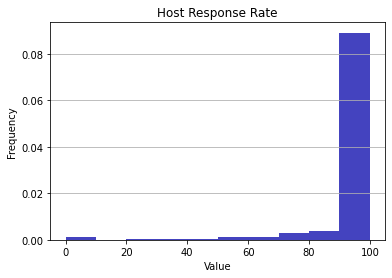

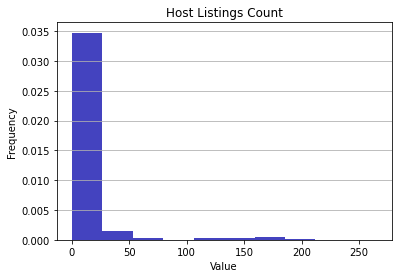

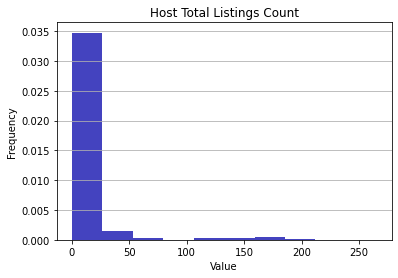

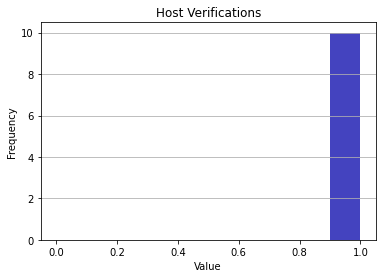

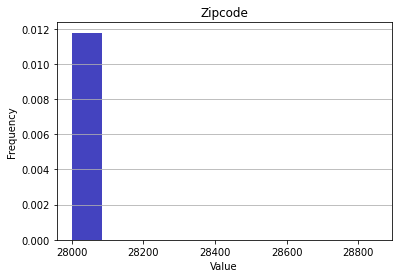

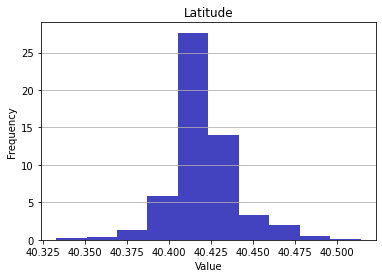

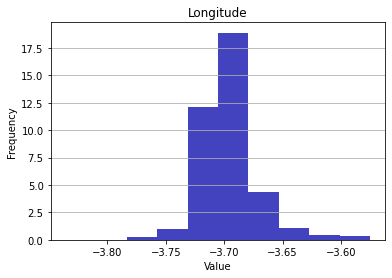

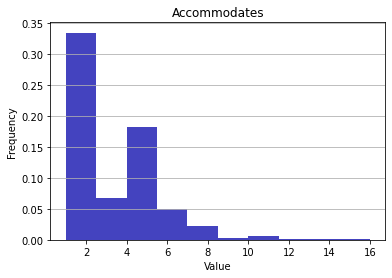

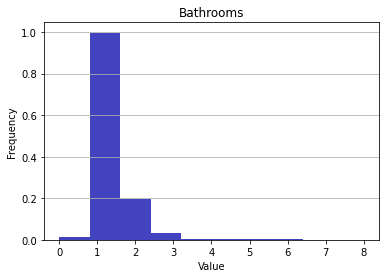

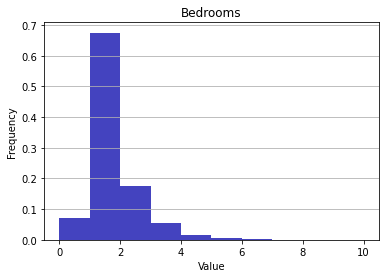

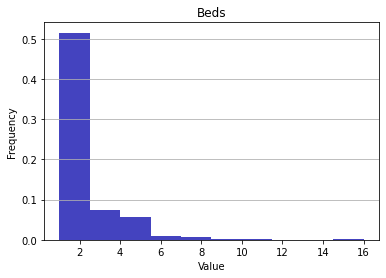

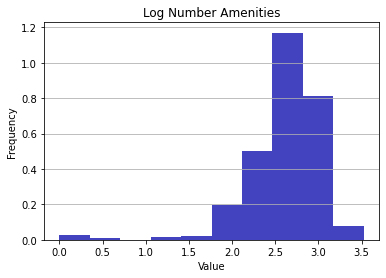

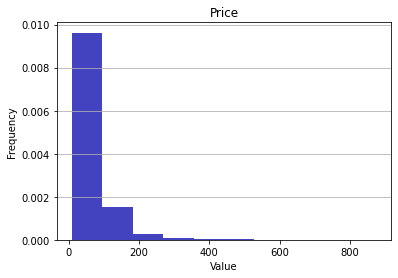

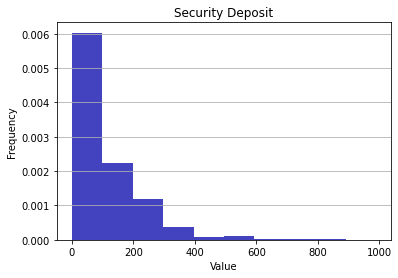

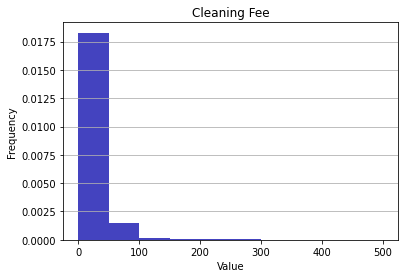

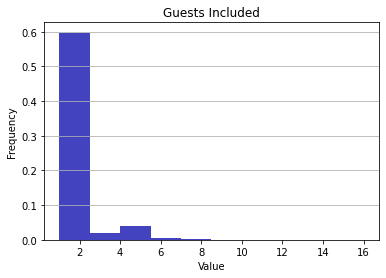

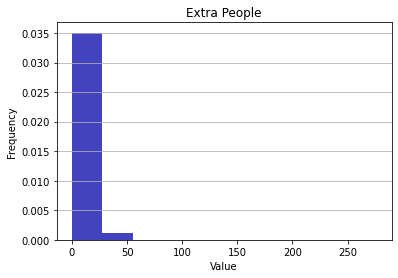

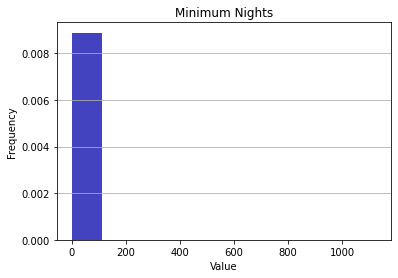

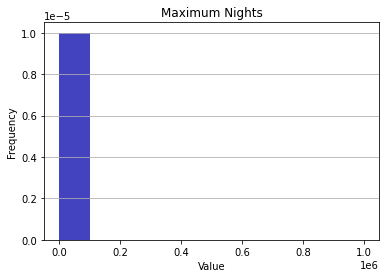

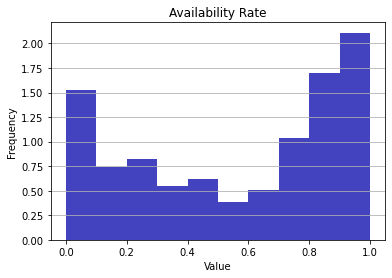

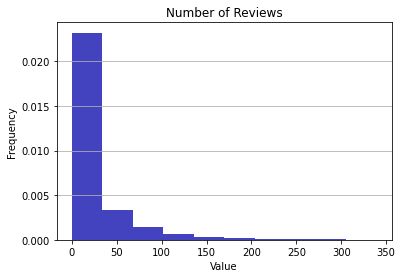

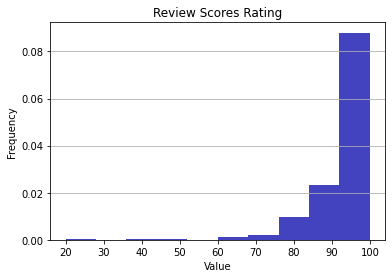

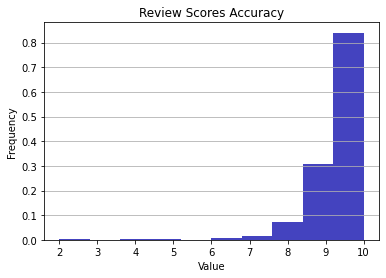

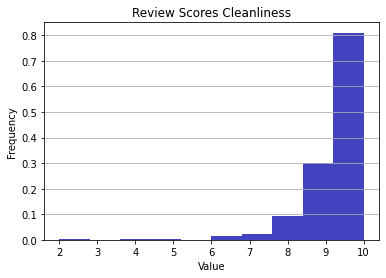

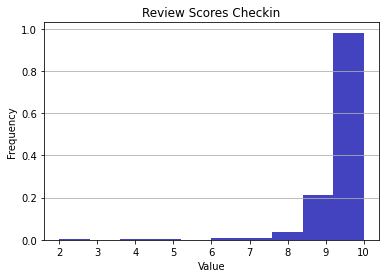

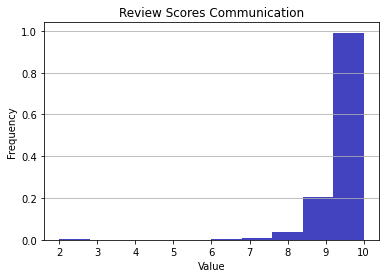

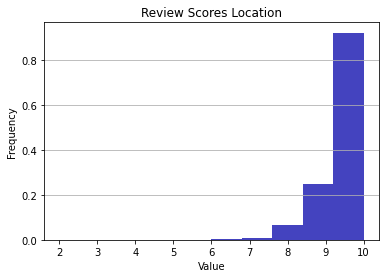

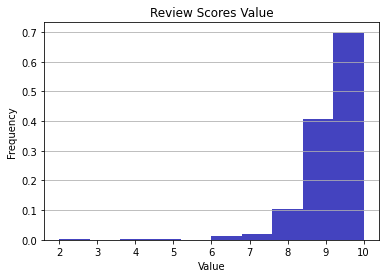

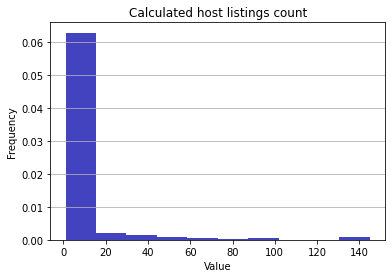

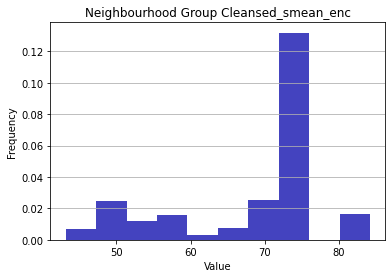

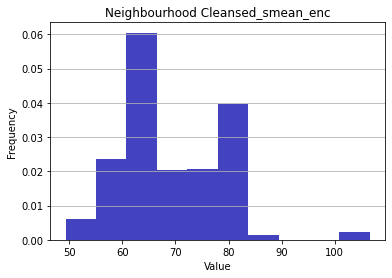

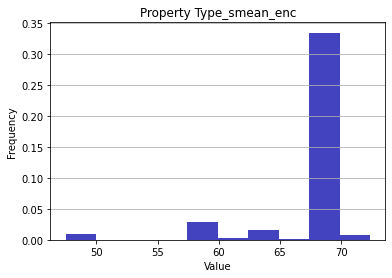

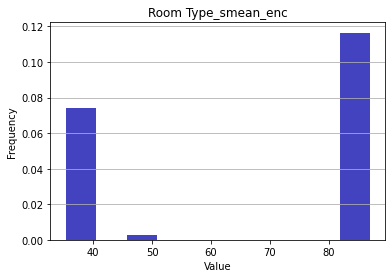

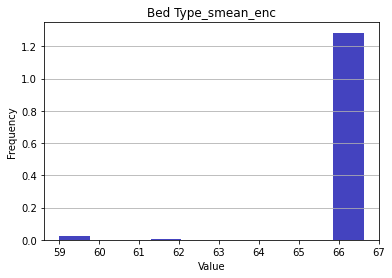

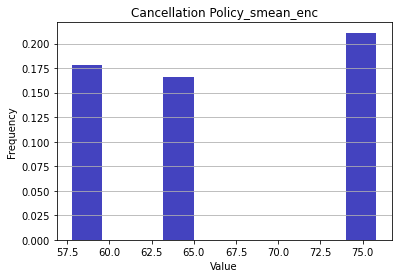

In [49]:
for column in data.columns:
    plt.hist(x=data[column],density = True, alpha= 0.75, color='#0504aa')
    plt.grid(axis='y')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(column)
    plt.show()

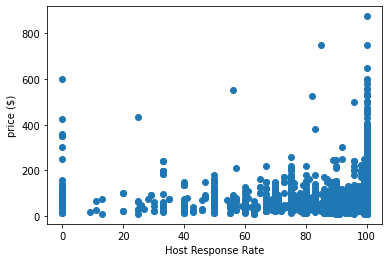

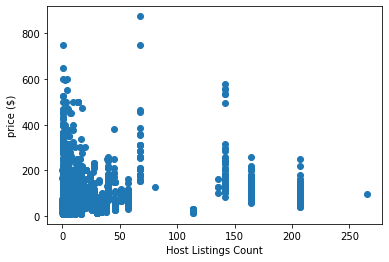

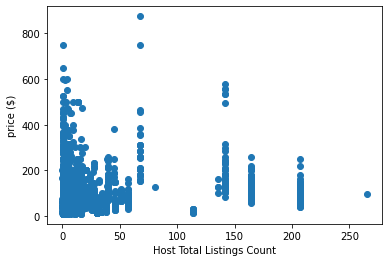

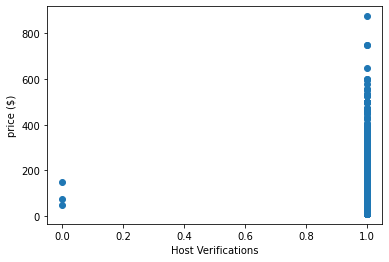

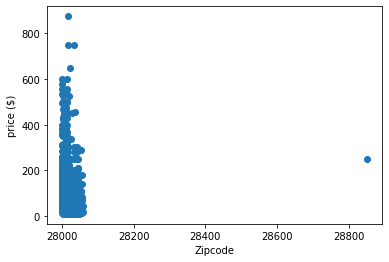

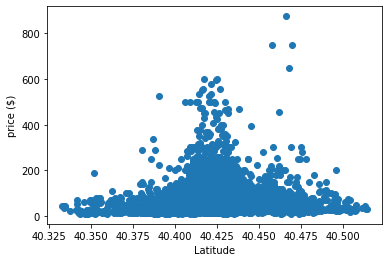

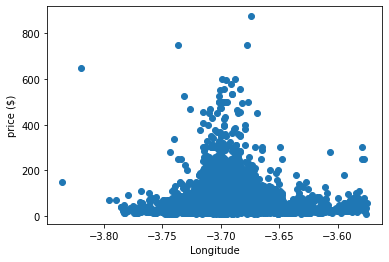

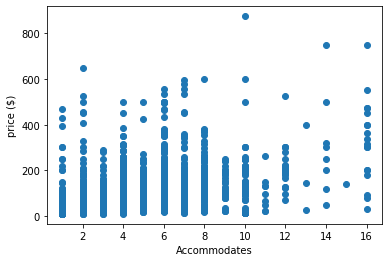

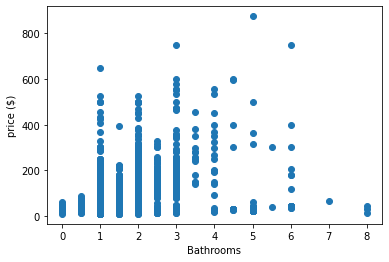

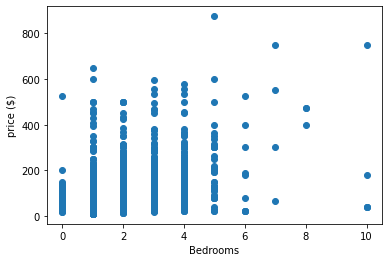

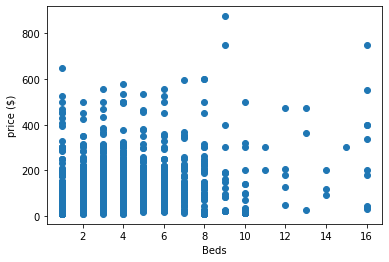

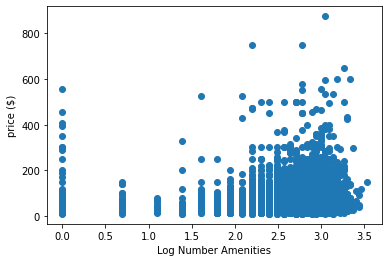

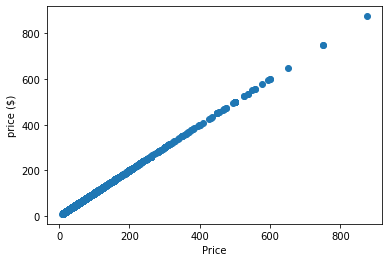

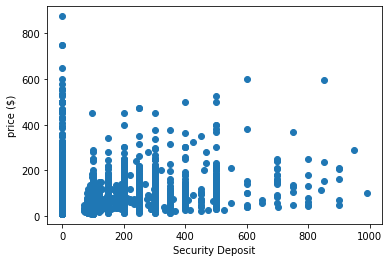

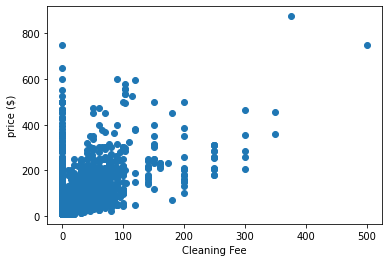

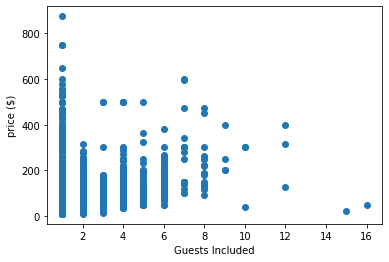

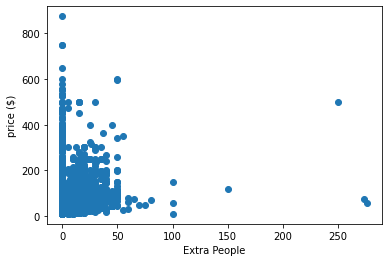

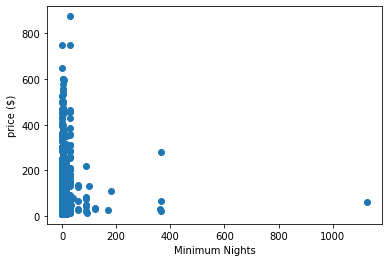

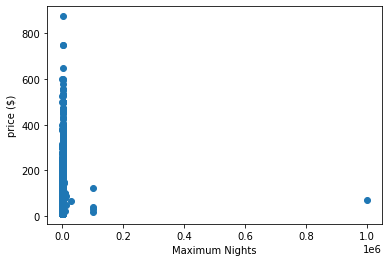

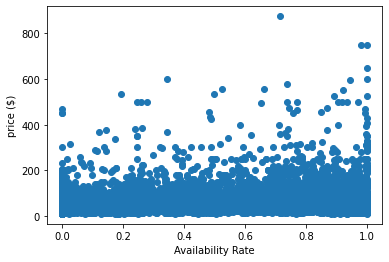

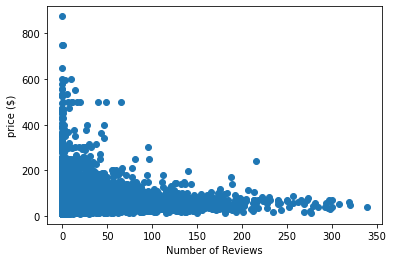

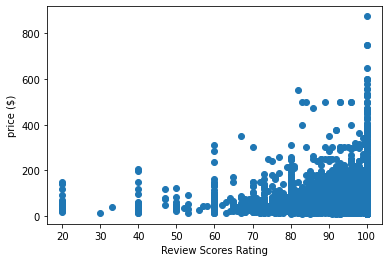

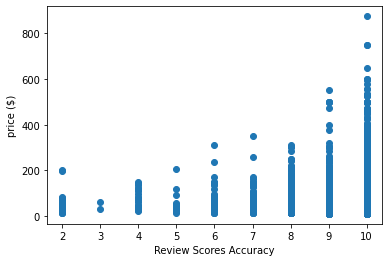

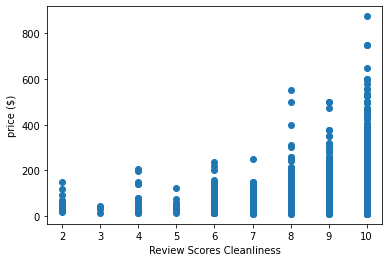

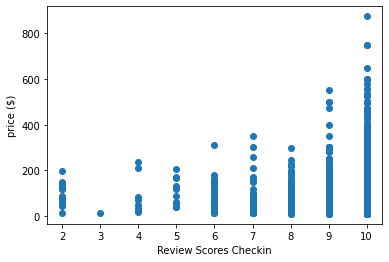

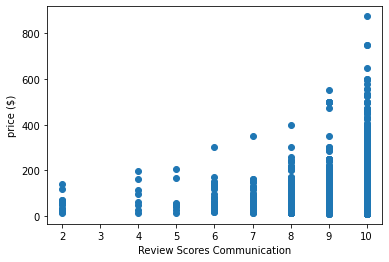

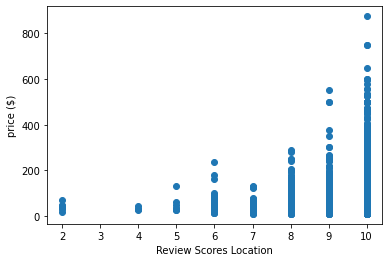

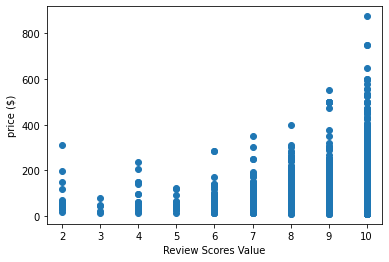

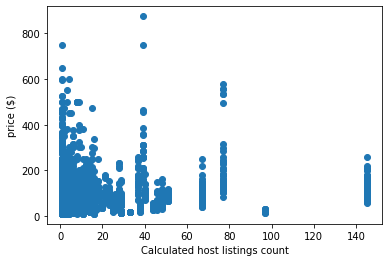

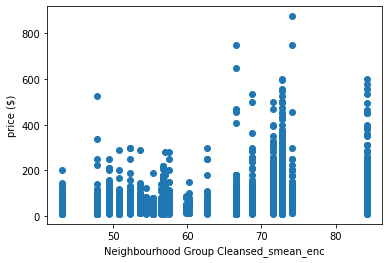

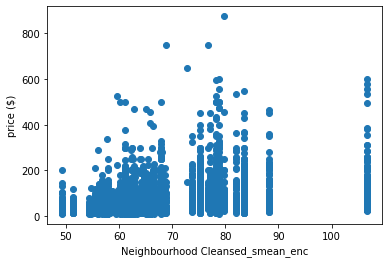

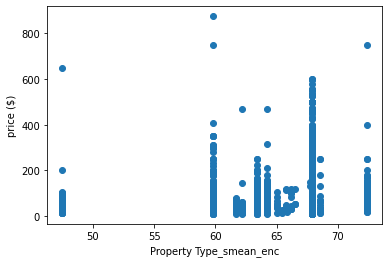

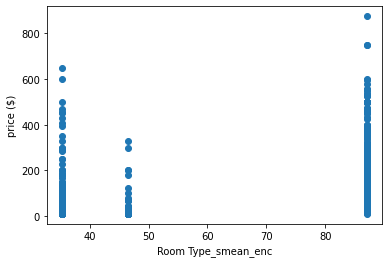

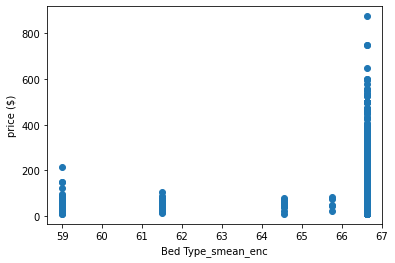

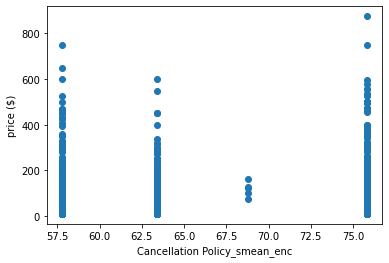

In [50]:
for column in data.columns:
    plt.scatter(x=data[column], y=data['Price'])
    plt.xlabel(column)
    plt.ylabel('price ($)')
    plt.show()

También estudiamos la relación entre variables

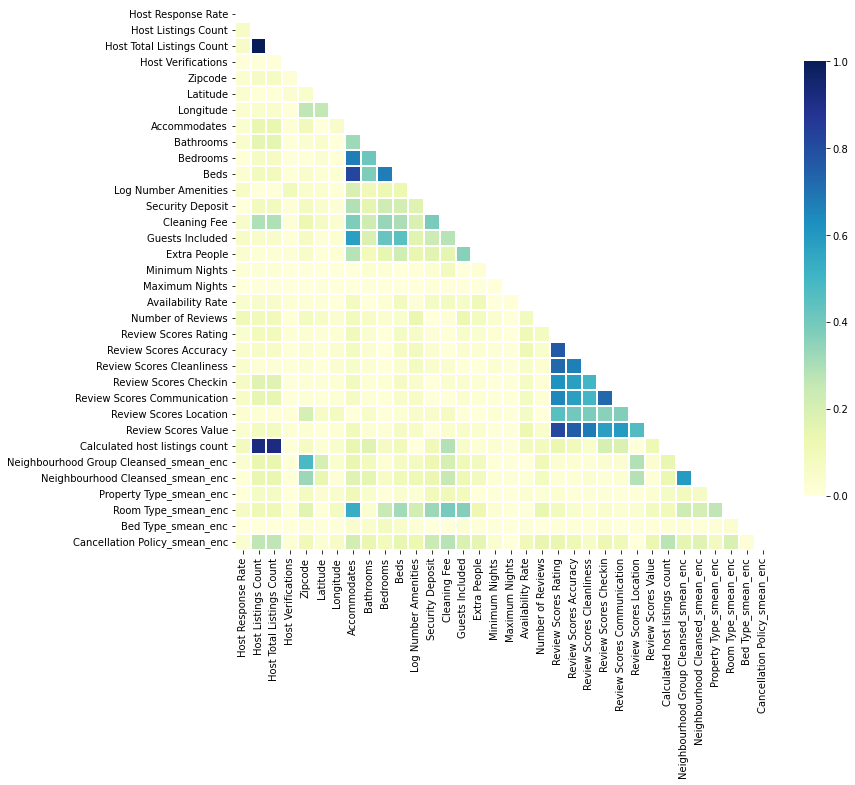

In [51]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Primero eliminamos columnas con alta correlación:
 - Host Listings Count
 - Host Total Listings Count
 - Review Scores Accuracy
 - Review Scores Cleanliness
 - Review Scores Checkin
 - Review Scores Communication
 - Review Scores Location
 - Accomodates

In [52]:
data.drop(['Host Listings Count', 'Host Total Listings Count','Review Scores Accuracy',
           'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication',
          'Review Scores Location', 'Review Scores Value', 'Accommodates'], axis = 1, inplace = True)

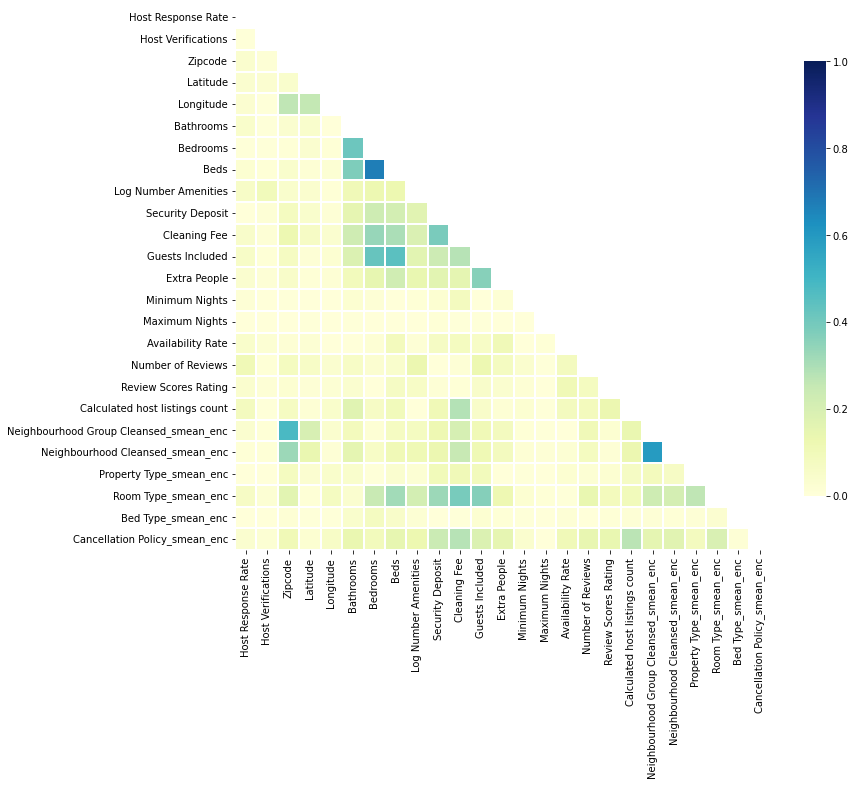

In [53]:
# Compute the correlation matrix
corr = np.abs(data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Ahora revisaremos los datos y conjuntamente con las gráficas anteriores eliminaremos los outlaiers que consideremos

In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,9241.0,95.512932,14.216899,0.000000,100.000000,100.000000,100.000000,100.000000
Host Verifications,9241.0,0.999675,0.018016,0.000000,1.000000,1.000000,1.000000,1.000000
Zipcode,9241.0,28014.940591,14.973947,28001.000000,28005.000000,28012.000000,28015.000000,28850.000000
Latitude,9241.0,40.420409,0.019854,40.332908,40.410105,40.418476,40.427734,40.514247
Longitude,9241.0,-3.697249,0.023253,-3.835498,-3.707850,-3.701622,-3.694020,-3.575142
Bathrooms,9241.0,1.258143,0.611749,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,9241.0,1.294773,0.832188,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,9241.0,1.989179,1.529186,1.000000,1.000000,1.000000,2.000000,16.000000
Log Number Amenities,9241.0,2.587860,0.444474,0.000000,2.397895,2.639057,2.833213,3.526361
Price,9241.0,66.323558,56.014155,9.000000,32.000000,53.000000,80.000000,875.000000


Eliminaremos los outliers en las siguientes columnas:
- Cleaning Fee -> Outliers mayores a 350
- Guests Included -> Outliers mayores a 10
- Extra People -> Outliers mayores a 100
- Maximum Nights -> Outliers mayores a 2000
- Minimum Nights -> Outliers mayores a 200

In [55]:
data = data[data['Cleaning Fee']<=350]
data = data[data['Guests Included']<=10]
data = data[data['Extra People']<=100]
data = data[data['Maximum Nights']<=2000]
data = data[data['Minimum Nights']<=200]
data.shape[0]

9207

Vamos a realizar un selección de características mediante método embedded de filtrado y Lasso

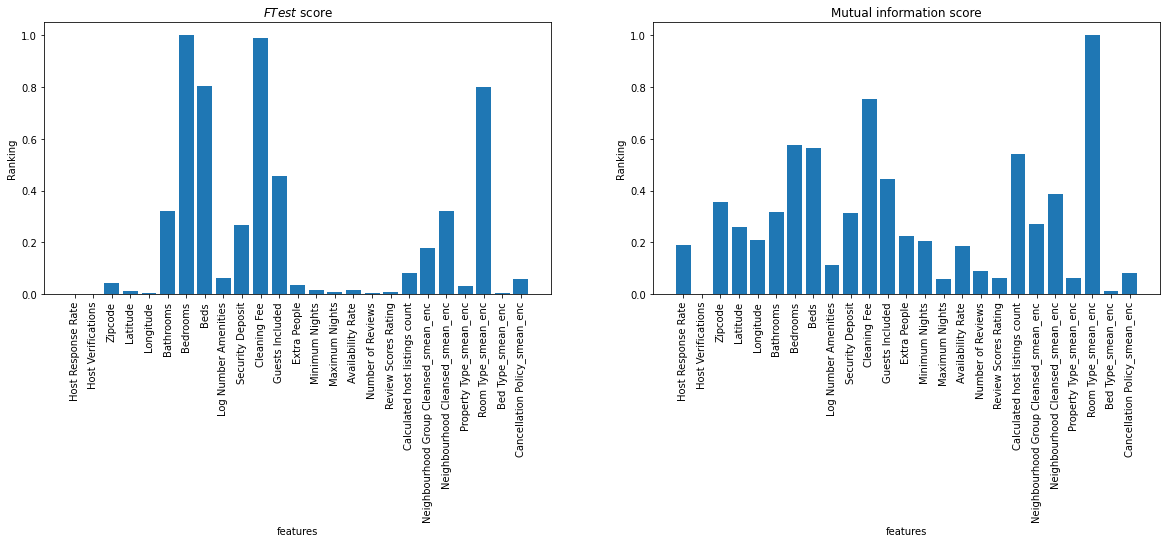

In [56]:
# convertimos el DataFrame al formato necesario para scikit-learn

data_value = data.values
y = data_value[:,9:10]  # nos quedamos con la 1ª columna, price
X = np.concatenate((data_value[:,0:9],data_value[:,10:]), axis=1, out=None) # nos quedamos con el resto
scalerX = preprocessing.StandardScaler().fit(X)
scalerY = preprocessing.StandardScaler().fit(y)

X = scalerX.transform(X)
y = scalerY.transform(y).reshape(9207,) 

feature_names = data.columns[0:9].append(data.columns[10:])


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$FTest$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

/home/javier/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.122e+01, tolerance: 8.377e-01
  model = cd_fast.enet_coordinate_descent(


best mean cross-validation score: -0.475
best parameters: {'alpha': 0.004641588833612773}


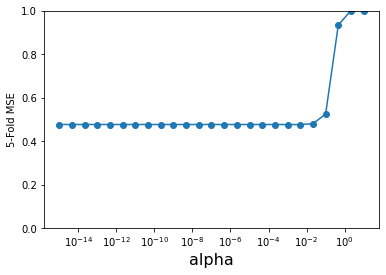

In [57]:
#Aplicamos Lasso con gridSearch

alpha_vector = np.logspace(-15,1,25)
param_grid = {'alpha': alpha_vector}
grid0 = GridSearchCV(Lasso(max_iter=50000), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid0.fit(X, y)
print("best mean cross-validation score: {:.3f}".format(grid0.best_score_))
print("best parameters: {}".format(grid0.best_params_))

scores = -1*np.array(grid0.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.ylim((0, 1))
plt.show()

In [58]:
# Entrenamos el modelo y revisamos el peso de las variables
alpha = grid0.best_params_['alpha']
lasso = Lasso(alpha = alpha, max_iter=10000).fit(X,y)
w = lasso.coef_
norm_w2 = np.dot(w,w.T)
    
# predicción
y_hat = lasso.predict(X)

# error
error_test = np.mean(np.power(y - y_hat,2)) 
coef_names = ['w' + str(i) + ': ' for i in range(0,25)]

for f,wi in zip(coef_names,w):
    print(f,wi)

w0:  -0.027264904611233647
w1:  -0.012966752594337185
w2:  0.01286747813122865
w3:  0.0
w4:  -0.007089350181526056
w5:  0.1143147150762582
w6:  0.23643795707429366
w7:  0.09794844414778545
w8:  -0.007950118621807696
w9:  0.0
w10:  0.2285510358483108
w11:  0.05986816140627095
w12:  -0.06206048768538129
w13:  -0.009320578804936454
w14:  -0.0
w15:  0.05760834715330481
w16:  -0.06107020794994052
w17:  0.07910152242442009
w18:  0.009704277045884998
w19:  0.04478375406366249
w20:  0.1471437628129014
w21:  -0.0009705094366453244
w22:  0.2628992844314255
w23:  0.00550248050561646
w24:  -0.03729057308547677


Quitaremos las variables con un impacto menor 0.01 que son w8, w9, w13, w14, w18, w19, w21, w23 que corresponden con Log Number Amenities, Security Deposit, Minimum Nights, Maximum Nights, Calculated host listings count, Neighbourhood Group Cleansed_smean_enc,Property Type_smean_enc, Bed Type_smean_enc

In [59]:
data.drop(['Log Number Amenities', 'Security Deposit',
           'Minimum Nights', 'Maximum Nights', 
           'Calculated host listings count', 
           'Neighbourhood Group Cleansed_smean_enc',
           'Property Type_smean_enc', 'Bed Type_smean_enc'], axis = 1, inplace = True)

Para finalizar el procesado de los datos para modelado vamos a crear un variable sintética a partir de la latitud y la longuitud llamada location

In [60]:
data['Location'] = data['Latitude']*data['Longitude']*-1
data.drop(['Latitude', 'Longitude'], axis = 1, inplace = True)

Podemos volver a pasar los test y filtros para revisar que la nueva variable no correlaciona con otra y su impacto en el resto

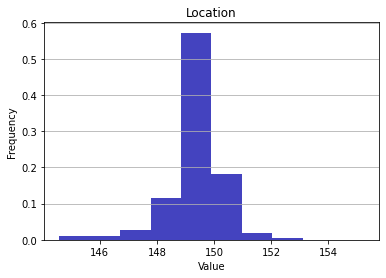

In [61]:
plt.hist(x=data['Location'],density = True, alpha= 0.75, color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Location')
plt.show()

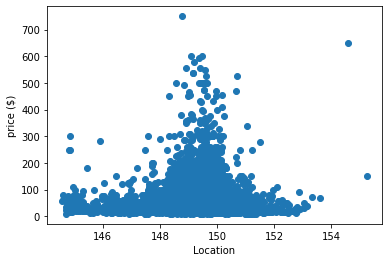

In [62]:
plt.scatter(x=data['Location'], y=data['Price'])
plt.xlabel('Location')
plt.ylabel('price ($)')
plt.show()

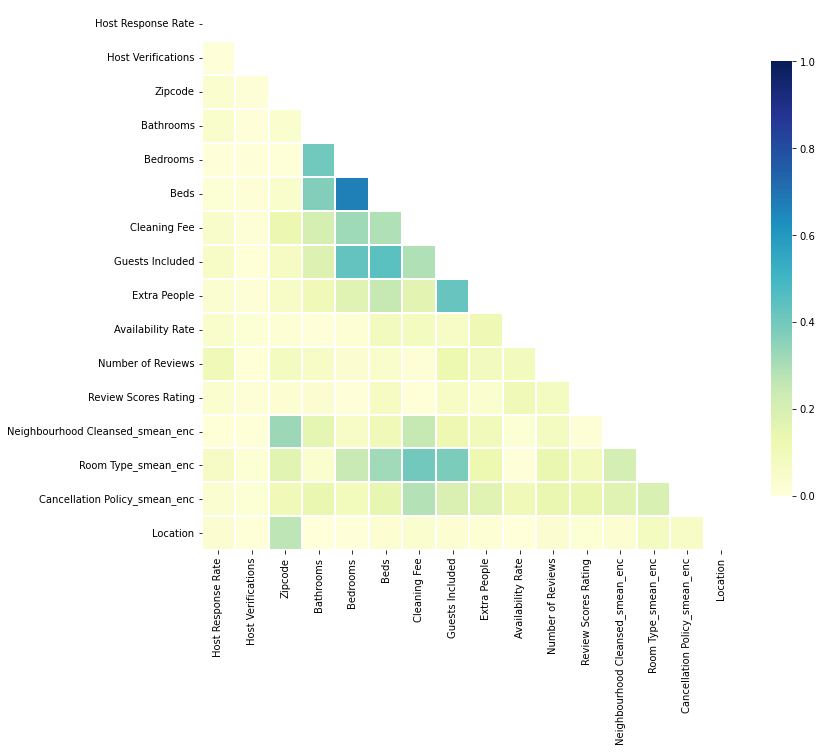

In [63]:
# Compute the correlation matrix
corr = np.abs(data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

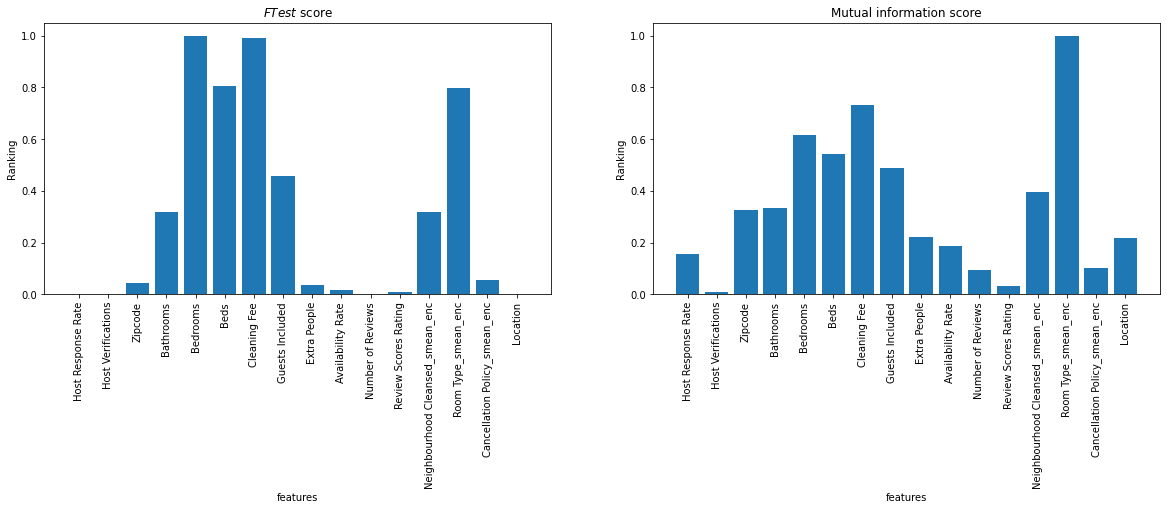

In [64]:
data_value = data.values
y = data_value[:,6:7]  # nos quedamos con la 1ª columna, price
X = np.concatenate((data_value[:,0:6],data_value[:,7:]), axis=1, out=None) # nos quedamos con el resto
scalerX = preprocessing.StandardScaler().fit(X)
scalerY = preprocessing.StandardScaler().fit(y)

X = scalerX.transform(X)
y = scalerY.transform(y).reshape(9207,) 

feature_names = data.columns[0:6].append(data.columns[7:])


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$FTest$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

best mean cross-validation score: -0.478
best parameters: {'alpha': 0.004641588833612773}


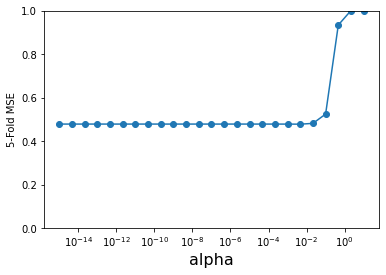

In [65]:
#Volvemos a aplicar la regularización de Lasso para ver si alguna nueva variable a perdido importancia en el nuevo conjunto
alpha_vector = np.logspace(-15,1,25)
param_grid = {'alpha': alpha_vector}
grid0 = GridSearchCV(Lasso(max_iter=10000), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid0.fit(X, y)
print("best mean cross-validation score: {:.3f}".format(grid0.best_score_))
print("best parameters: {}".format(grid0.best_params_))

scores = -1*np.array(grid0.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.ylim((0, 1))
plt.show()

In [66]:
# ...
alpha = grid0.best_params_['alpha']
lasso = Lasso(alpha = alpha, max_iter=10000).fit(X,y)
w = lasso.coef_
norm_w2 = np.dot(w,w.T)
    
# predicción
y_hat = lasso.predict(X)

# error
error_test = np.mean(np.power(y - y_hat,2)) 
coef_names = ['w' + str(i) + ': ' for i in range(0,16)]

for f,wi in zip(coef_names,w):
    print(f,wi)

w0:  -0.027799817473036746
w1:  -0.013905285680801169
w2:  0.0
w3:  0.11554093482725646
w4:  0.23391420296990542
w5:  0.09845147549565815
w6:  0.228824101490208
w7:  0.05970810481370776
w8:  -0.06181454693935179
w9:  0.05768438387912027
w10:  -0.061159188707505634
w11:  0.07660465557790724
w12:  0.16854514328309983
w13:  0.2652340335995175
w14:  -0.03499083801649461
w15:  0.0025316519846014744


Eliminamos zipcode

In [67]:
data.drop(['Zipcode'], axis = 1, inplace = True)

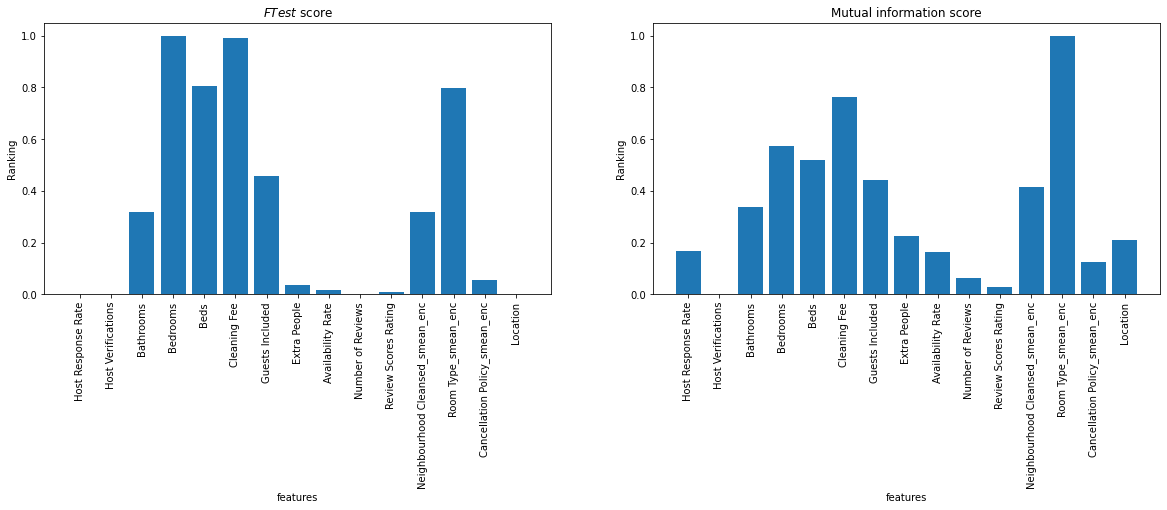

In [68]:
data_value = data.values
y = data_value[:,5:6]  # nos quedamos con la 1ª columna, price
X = np.concatenate((data_value[:,0:5],data_value[:,6:]), axis=1, out=None) # nos quedamos con el resto
scalerX = preprocessing.StandardScaler().fit(X)
scalerY = preprocessing.StandardScaler().fit(y)

X = scalerX.transform(X)
y = scalerY.transform(y).reshape(9207,) 

feature_names = data.columns[0:5].append(data.columns[6:])


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$FTest$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

best mean cross-validation score: -0.475
best parameters: {'alpha': 0.00021544346900318777}


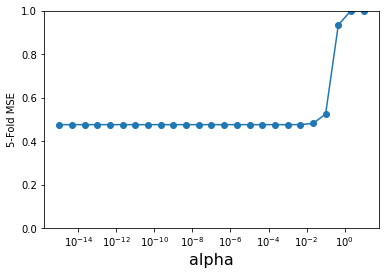

In [69]:
alpha_vector = np.logspace(-15,1,25)
param_grid = {'alpha': alpha_vector}
grid0 = GridSearchCV(Lasso(max_iter=50000), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid0.fit(X, y)
print("best mean cross-validation score: {:.3f}".format(grid0.best_score_))
print("best parameters: {}".format(grid0.best_params_))

scores = -1*np.array(grid0.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.ylim((0, 1))
plt.show()

In [70]:
alpha = grid0.best_params_['alpha']
lasso = Lasso(alpha = alpha, max_iter=50000).fit(X,y)
w = lasso.coef_
norm_w2 = np.dot(w,w.T)
    
# predicción
y_hat = lasso.predict(X)

# error
error_test = np.mean(np.power(y - y_hat,2)) 
coef_names = ['w' + str(i) + ': ' for i in range(0,16)]

for f,wi in zip(coef_names,w):
    print(f,wi)

w0:  -0.0319596224875169
w1:  -0.018085439854375936
w2:  0.11878029572614462
w3:  0.23340680291077642
w4:  0.10013502731139426
w5:  0.23078857586254917
w6:  0.06573932907747919
w7:  -0.06957663946753434
w8:  0.06346940207454219
w9:  -0.06523684446235167
w10:  0.08101030179103845
w11:  0.1722977360976598
w12:  0.2686718932831401
w13:  -0.04118855462280806
w14:  0.007120806614069836


Al volver a aplicar lasso por tercera vezm hemos comprobado que las variables mantiene algún peso

## Creación de Modelos
En este apartado vamos a realizar probar varios modelos y mediante Cross Validation elegir los mejores para testar en test. Los modelos seleccionados son:
- Random Forest
- Baggin Model Decision Tree Regressor
- Boosted Tree
- SVR
- Kernel Ridge Regression

Para comparar los modelos se utilizará el error cuadratico medio entre el precio predicho y el precio real

### Random Forest

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................................max_depth=1; total time=   0.7s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=2; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   0.8s
[CV] END ........................................max_depth=2; total time=   0.8s
[CV] END ........................................max_depth=3; total time=   1.1s
[CV] END .......................................

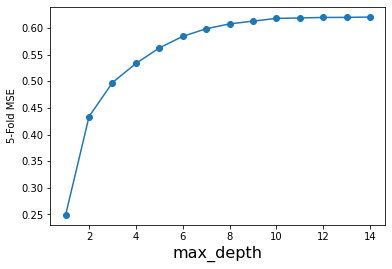

In [156]:
#Aplicamos en range = max variable y comprobamos con Cross Validation
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(RandomForestRegressor(n_estimators=200, random_state=0), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X, y)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [157]:
#Se escoge 10 como parametro libre por el resultado no modifica mucho y simplifica el modelo
maxDepthOptimo = 10
randomforestmodel = RandomForestRegressor(max_depth=maxDepthOptimo).fit(X,y)

In [158]:
#Calculamos el error del modelo
y_hat = randomforestmodel.predict(X)
error = np.mean(np.power(y - y_hat,2)) 
error_medio = np.mean(np.abs(y-y_hat))
print(f'El error cuadrático en datos de train de RandomForest es de: {error}')
error_transfor = scalerY.inverse_transform(error.reshape(-1,1))
print(f'El error medio en datos de train de RandomForest de: {error_medio}')

El error cuadrático en datos de train de RandomForest es de: 0.16962589253479615
El error medio en datos de train de RandomForest de: 0.2540334871270225


### Baggin Regresor

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................base_estimator__max_depth=1; total time=   0.6s
[CV] END ........................base_estimator__max_depth=1; total time=   0.6s
[CV] END ........................base_estimator__max_depth=1; total time=   0.6s
[CV] END ........................base_estimator__max_depth=1; total time=   0.6s
[CV] END ........................base_estimator__max_depth=1; total time=   0.6s
[CV] END ........................base_estimator__max_depth=2; total time=   0.9s
[CV] END ........................base_estimator__max_depth=2; total time=   0.9s
[CV] END ........................base_estimator__max_depth=2; total time=   0.9s
[CV] END ........................base_estimator__max_depth=2; total time=   0.9s
[CV] END ........................base_estimator__max_depth=2; total time=   0.9s
[CV] END ........................base_estimator__max_depth=3; total time=   1.2s
[CV] END ........................base_estimator_

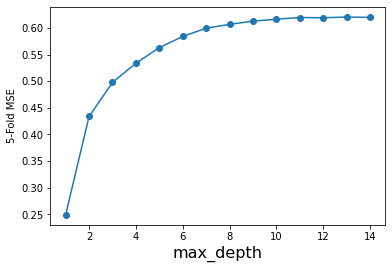

In [159]:
#Igual que en el modelo anterior aplicamos max_depth = max_variables
maxDepth = range(1,15)
param_grid = {'base_estimator__max_depth': maxDepth }
grid1 = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=200, random_state=0), param_grid=param_grid, cv = 5, verbose=2)
grid1.fit(X, y)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid1.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [95]:
#También escojemos 10 para entrenar el modelo
maxDepthOptimo = 10
baggingregresormodel = BaggingRegressor(DecisionTreeRegressor(max_depth=maxDepthOptimo), n_estimators=200).fit(X,y)

In [96]:
#Calculamos el error del modelo con los datos de train
y_hat = baggingregresormodel.predict(X)
error = np.mean(np.power(y - y_hat,2)) 
print(f'El error cuadrático en datos de train de Baggin Regressor de: {error}')
error_transfor = scalerY.inverse_transform(error.reshape(-1,1))
print(f'El error cuadrático en datos de train de Baggin Regressor de: {error_transfor}')

El error cuadrático en datos de train de Baggin Regressor de: 0.16820420072700296
El error cuadrático en datos de train de Baggin Regressor de: [[75.18634989]]


### Boost Tree Gradient

In [77]:
#Esto tarda un rato, analizamos diferentes interacciones, con diferentes learningRate y una profundidad = 14
Niterations = [250, 500, 750, 1000,1500,2000]
learningRate = [0.1,0.05, 0.025, 0.001]
maxDepth = range(1,15)

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate, 'max_depth': maxDepth}
grid2 = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5, verbose=2)
grid2.fit(X, y)
print("best mean cross-validation score: {:.3f}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=250; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=250; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=250; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=250; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=250; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=500; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=500; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=500; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=500; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=500; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=750; total time=   2.0s
[CV] END ...learning_rate=0.1, max_depth=1, n

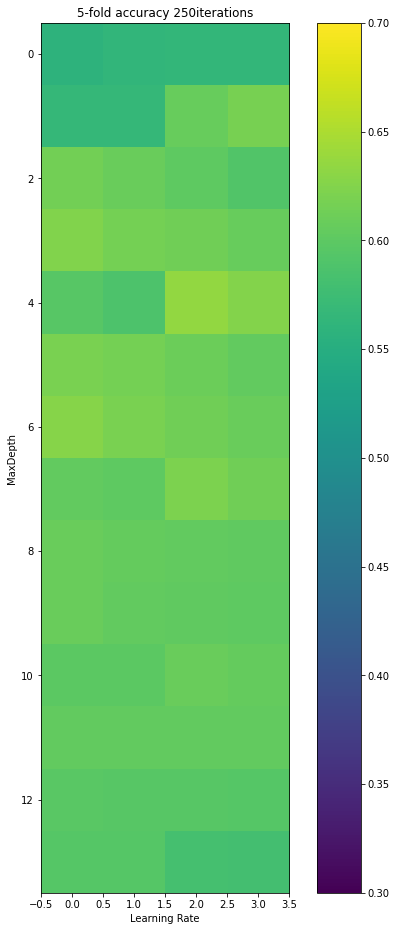

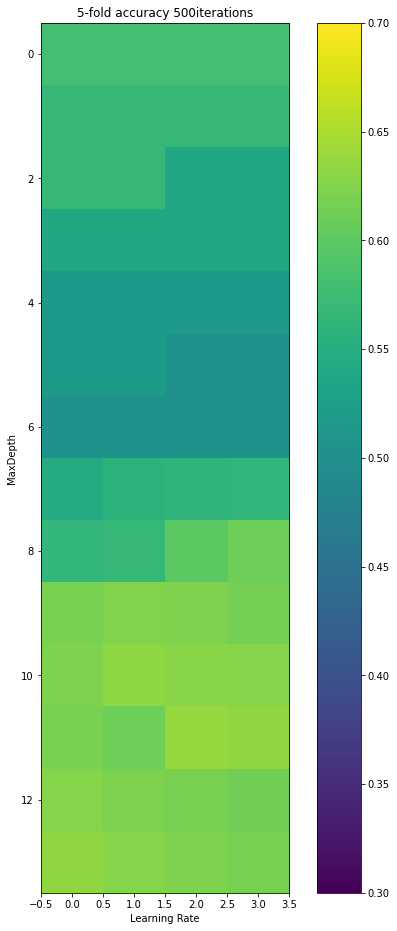

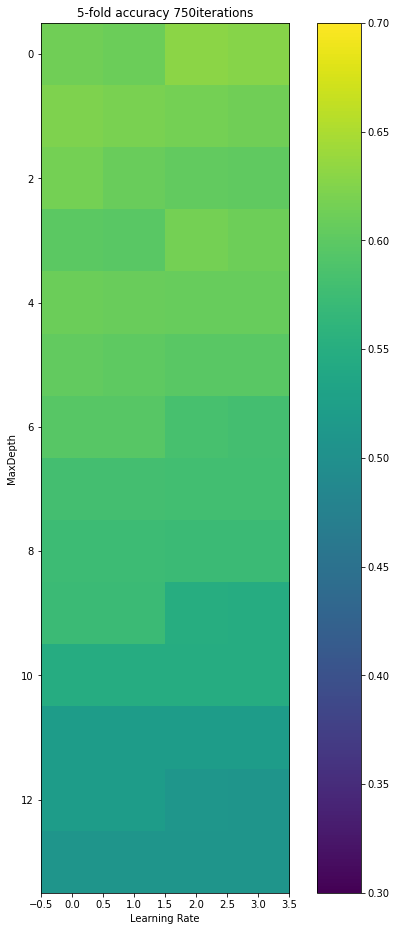

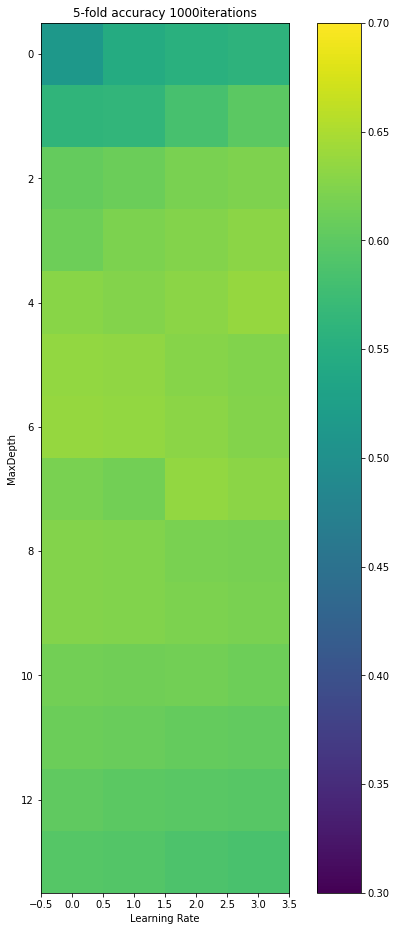

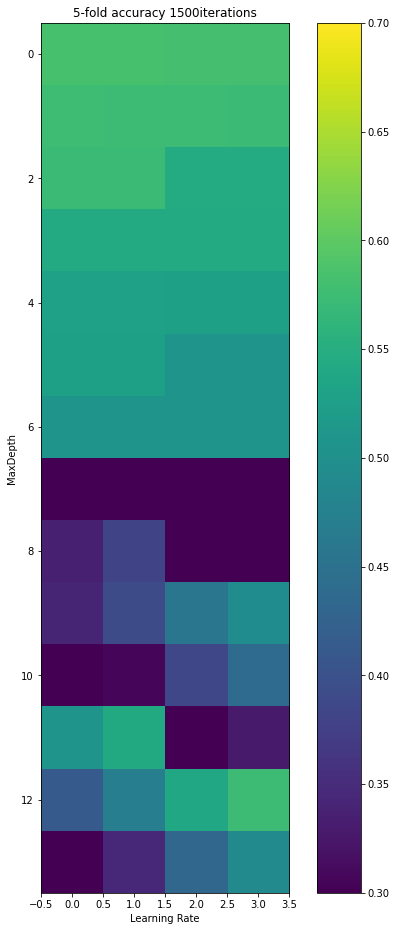

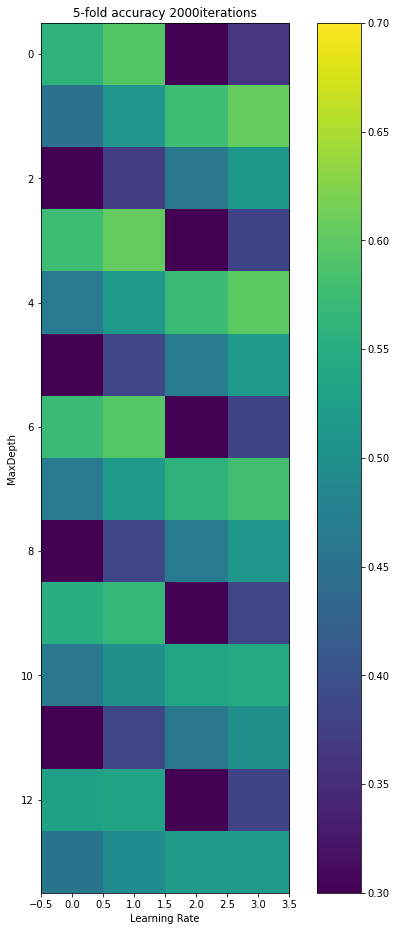

In [78]:
#Pintamos las graficas
for i in Niterations:
    scores = grid2.cv_results_['mean_test_score'][Niterations.index(i)*56:Niterations.index(i)*56+56].reshape(len(maxDepth),len(learningRate))
    plt.figure(figsize=(10,16))
    plt.imshow(scores, interpolation='nearest', vmin= 0.3, vmax=0.7)
    plt.xlabel('Learning Rate')
    plt.ylabel('MaxDepth')
    plt.colorbar()
    plt.title('5-fold accuracy ' + str(i) + 'iterations')
    plt.show()

In [81]:
#Aceptamos los datos 6 de profundidad, 1000 parametros y 0.05
lrOptimo = 0.05
neOptimo = 1000
maxDepth = 6
gradBoostregmodel = GradientBoostingRegressor(random_state=0, max_depth=maxDepth,learning_rate=lrOptimo, n_estimators=neOptimo)
gradBoostregmodel.fit(X,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=6, n_estimators=1000,
                          random_state=0)

In [82]:
#Entrenamos el modelo y evaluamos los errores
y_hat = gradBoostregmodel.predict(X)
error = np.mean(np.power(y - y_hat,2)) 
print(f'El error cuadrático en datos de train de GradientBoostingRegressor de: {error}')
error_transfor = scalerY.inverse_transform(error.reshape(-1,1))
print(f'El error cuadrático en datos de train de GradientBoostingRegressor de: {error_transfor}')


El error cuadrático en datos de train de GradientBoostingRegressor de: 0.03439876838816192
El error cuadrático en datos de train de GradientBoostingRegressor de: [[67.88384774]]


### SVR

In [71]:
#Definimos la cross validation
vectorC = np.logspace(-1, 4, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid3 = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=2)
grid3.fit(X, y)

print("best mean cross-validation score: {:.3f}".format(grid3.best_score_))
print("best parameters: {}".format(grid3.best_params_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END .................................C=0.1, gamma=1e-05; total time=   3.2s
[CV] END .................................C=0.1, gamma=1e-05; total time=   3.0s
[CV] END .................................C=0.1, gamma=1e-05; total time=   3.0s
[CV] END .................................C=0.1, gamma=1e-05; total time=   3.0s
[CV] END .................................C=0.1, gamma=1e-05; total time=   2.9s
[CV] END .................C=0.1, gamma=7.196856730011514e-05; total time=   2.9s
[CV] END .................C=0.1, gamma=7.196856730011514e-05; total time=   2.9s
[CV] END .................C=0.1, gamma=7.196856730011514e-05; total time=   2.9s
[CV] END .................C=0.1, gamma=7.196856730011514e-05; total time=   2.9s
[CV] END .................C=0.1, gamma=7.196856730011514e-05; total time=   2.9s
[CV] END .................C=0.1, gamma=0.0005179474679231213; total time=   2.5s
[CV] END .................C=0.1, gamma=0.000517

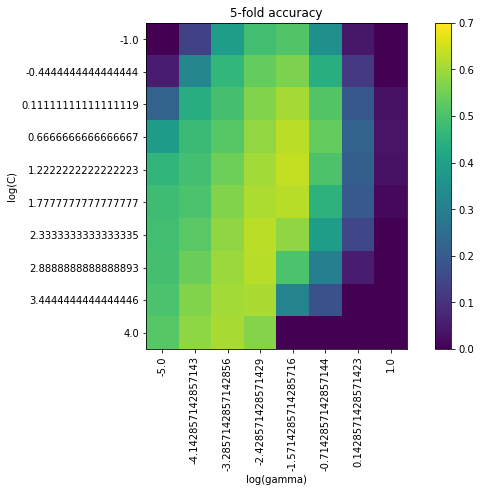

In [72]:
#Ploteamos los resultado
scores = grid3.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0, vmax=0.7)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [73]:
#Entrenamos el modelo con los mejores parametros detectados y en calculamos el error 
Copt = grid3.best_params_['C']
Gopt = grid3.best_params_['gamma']

svrModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(X,y)

y_hat = svrModel.predict(X)
error = np.mean(np.power(y - y_hat,2)) 
print(f'El error cuadrático en datos de train de svrModel de: {error}')
error_transfor = scalerY.inverse_transform(error.reshape(-1,1))
print(f'El error cuadrático en datos de train de svrModel de: {error_transfor}')

El error cuadrático en datos de train de svrModel de: 0.2738184775945996
El error cuadrático en datos de train de svrModel de: [[80.95030483]]


### Kernel Ridge Regression

In [74]:
#Hacemos un CV de Kerner Ridge Regression
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'alpha': vectorC, 'gamma':vectorG}
grid4 = GridSearchCV(KernelRidge(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=2)
grid4.fit(X, y)



Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ............................alpha=0.01, gamma=1e-05; total time=   3.4s
[CV] END ............................alpha=0.01, gamma=1e-05; total time=   3.5s
[CV] END ............................alpha=0.01, gamma=1e-05; total time=   3.5s
[CV] END ............................alpha=0.01, gamma=1e-05; total time=   3.5s
[CV] END ............................alpha=0.01, gamma=1e-05; total time=   3.5s
[CV] END ............alpha=0.01, gamma=7.196856730011514e-05; total time=   3.5s
[CV] END ............alpha=0.01, gamma=7.196856730011514e-05; total time=   3.5s
[CV] END ............alpha=0.01, gamma=7.196856730011514e-05; total time=   3.5s
[CV] END ............alpha=0.01, gamma=7.196856730011514e-05; total time=   3.5s
[CV] END ............alpha=0.01, gamma=7.196856730011514e-05; total time=   3.5s
[CV] END ............alpha=0.01, gamma=0.0005179474679231213; total time=   3.5s
[CV] END ............alpha=0.01, gamma=0.000517

GridSearchCV(cv=5, estimator=KernelRidge(kernel='rbf'),
             param_grid={'alpha': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 7.19685673e-05, 5.17947468e-04, 3.72759372e-03,
       2.68269580e-02, 1.93069773e-01, 1.38949549e+00, 1.00000000e+01])},
             verbose=2)

best mean cross-validation score: 0.640
best parameters: {'alpha': 0.21544346900318834, 'gamma': 0.026826957952797246}


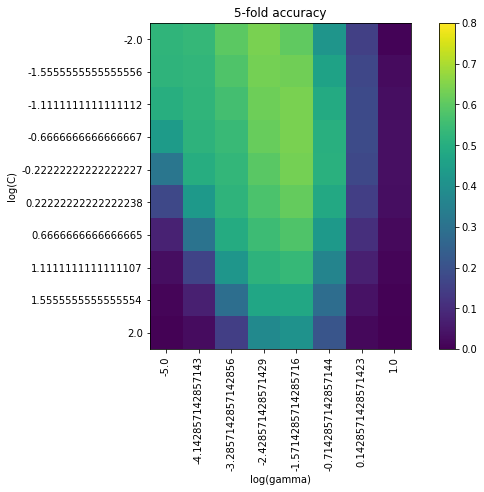

In [75]:
#Ploteamos los resultados de las prestaciones en CV

print("best mean cross-validation score: {:.3f}".format(grid4.best_score_))
print("best parameters: {}".format(grid4.best_params_))

scores = grid4.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0, vmax=0.8)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [76]:
Calpha = grid4.best_params_['alpha']
Ggamma = grid4.best_params_['gamma']
# definimos modelo
kRidge = KernelRidge(kernel='rbf',gamma=Ggamma ,alpha=Calpha)
kRidge.fit(X,y)

#Calculamos el error del modelo con los datos de train
y_hat = kRidge.predict(X)
error = np.mean(np.power(y - y_hat,2))
print(f'El error cuadrático en datos de train de kRidge de: {error}')
error_transfor = scalerY.inverse_transform(error.reshape(-1,1))
print(f'El error cuadrático en datos de train de kRidge de: {error_transfor}')

El error cuadrático en datos de train de kRidge de: 0.27343378101707416
El error cuadrático en datos de train de kRidge de: [[80.92930982]]


Vamos a probar en Test los modelos de baggin regresor, Boosted Tree Gradient y Kernel Rigde Regresion

### Probamos en Test

Ahora vamos a realizar el testeo en real para elegir el modelo final

In [85]:
#Cargamos los datos
test = pd.read_csv('./test.csv', sep=';', decimal='.')
test= test[test['Country']=='Spain']
test= test[test['City']=='Madrid']

In [86]:
#Eliminamos las columnas que no vamos a utilizar
test.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Street',
       'Neighbourhood',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country',
       'Property Type', 'Accommodates',
       'Bed Type', 'Amenities', 'Square Feet', 'Weekly Price',
       'Monthly Price', 'Security Deposit',
       'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Calendar last Scraped',
       'First Review', 'Last Review',
       'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdiction Names',
       'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features'], axis=1, inplace = True)

In [87]:
for column in range(0, test.shape[1]):
    tasa_na = round((test[test.columns.values[column]].isnull().sum()/test.shape[0])*100, 2)
    print(f'La tasa de NAs es de {test.columns.values[column]} es: {tasa_na}%')

La tasa de NAs es de Host Response Rate es: 12.58%
La tasa de NAs es de Host Verifications es: 0.05%
La tasa de NAs es de Neighbourhood Cleansed es: 0.0%
La tasa de NAs es de Latitude es: 0.0%
La tasa de NAs es de Longitude es: 0.0%
La tasa de NAs es de Room Type es: 0.0%
La tasa de NAs es de Bathrooms es: 0.35%
La tasa de NAs es de Bedrooms es: 0.13%
La tasa de NAs es de Beds es: 0.38%
La tasa de NAs es de Price es: 0.03%
La tasa de NAs es de Cleaning Fee es: 42.02%
La tasa de NAs es de Guests Included es: 0.0%
La tasa de NAs es de Extra People es: 0.0%
La tasa de NAs es de Availability 365 es: 0.0%
La tasa de NAs es de Number of Reviews es: 0.0%
La tasa de NAs es de Review Scores Rating es: 20.97%
La tasa de NAs es de Cancellation Policy es: 0.0%


In [88]:
#Hacemos las transformaciones necesarias
test['Cleaning Fee'] = test['Cleaning Fee'].apply(lambda x: 0 if (pd.isnull(x)) else x)
test['Bathrooms'].fillna(data['Bathrooms'].mode()[0], inplace=True)
test['Bedrooms'].fillna(data['Bedrooms'].mode()[0], inplace=True)
test['Beds'].fillna(data['Beds'].mode()[0], inplace=True)
test['Review Scores Rating'].fillna(test['Review Scores Rating'].mode()[0], inplace=True)
test['Host Response Rate'].fillna(data['Host Response Rate'].mode()[0], inplace=True)
test['Host Verifications'] = test['Host Verifications'].apply(lambda x: 0 if (pd.isnull(x)) else 1)
test['Availability 365'].apply(lambda x: x/365)
test.rename(columns = {'Availability 365':'Availability Rate'}, inplace=True)
test = test[test.Price.notnull()]


In [89]:
#Definimos una función para los valores codificados
def cod_var(variable):
    values = dict_values_variables[variable]
    test.loc[:,(variable+'_smean_enc')] = test[variable].map(values)
    test[(variable+'_smean_enc')] = test[(variable+'_smean_enc')].apply(lambda x: mean_all if pd.isnull(x) else x)
    return test.drop([variable], axis = 1, inplace = True)

cod_var('Neighbourhood Cleansed')
cod_var('Room Type')
cod_var('Cancellation Policy')
test['Location'] = test['Latitude']*test['Longitude']*-1
test.drop(['Latitude', 'Longitude'], axis = 1, inplace = True)

In [90]:
#Revisamos los NA
for column in range(0, test.shape[1]):
    tasa_na = round((test[test.columns.values[column]].isnull().sum()/test.shape[0])*100, 2)
    print(f'La tasa de NAs es de {test.columns.values[column]} es: {tasa_na}%')

La tasa de NAs es de Host Response Rate es: 0.0%
La tasa de NAs es de Host Verifications es: 0.0%
La tasa de NAs es de Bathrooms es: 0.0%
La tasa de NAs es de Bedrooms es: 0.0%
La tasa de NAs es de Beds es: 0.0%
La tasa de NAs es de Price es: 0.0%
La tasa de NAs es de Cleaning Fee es: 0.0%
La tasa de NAs es de Guests Included es: 0.0%
La tasa de NAs es de Extra People es: 0.0%
La tasa de NAs es de Availability Rate es: 0.0%
La tasa de NAs es de Number of Reviews es: 0.0%
La tasa de NAs es de Review Scores Rating es: 0.0%
La tasa de NAs es de Neighbourhood Cleansed_smean_enc es: 0.0%
La tasa de NAs es de Room Type_smean_enc es: 0.0%
La tasa de NAs es de Cancellation Policy_smean_enc es: 0.0%
La tasa de NAs es de Location es: 0.0%


In [91]:
data.dtypes

Host Response Rate                  float64
Host Verifications                    int64
Bathrooms                           float64
Bedrooms                            float64
Beds                                float64
Price                               float64
Cleaning Fee                        float64
Guests Included                       int64
Extra People                          int64
Availability Rate                   float64
Number of Reviews                     int64
Review Scores Rating                float64
Neighbourhood Cleansed_smean_enc    float64
Room Type_smean_enc                 float64
Cancellation Policy_smean_enc       float64
Location                            float64
dtype: object

In [92]:
#Comprobamos que las columnas están iguales que nuestro modelo
data.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [93]:
test_value = test.values
y_test = test_value[:,5:6]  # nos quedamos con la columna price
X_test = np.concatenate((test_value[:,0:5],test_value[:,6:]), axis=1, out=None) # nos quedamos con el resto

X_test = scalerX.transform(X_test)
y_test = scalerY.transform(y_test).reshape(3957,) 

feature_names_test = test.columns[0:5].append(test.columns[6:])

In [113]:
y_hat_test = baggingregresormodel.predict(X_test)
error = np.mean(np.power(y_test - y_hat_test,2))
error_max = np.max(y_test - y_hat_test)
error_min = np.min(abs(y_test - y_hat_test))
error_mean = np.mean(y_test - y_hat_test)
print(f'El error cuadrático en datos de test de baggingregresormodel es de: {error}')
error_transfor = scalerY.inverse_transform(error.reshape(-1,1))
print(f'El error cuadrático en datos de test de baggingregresormodel de: {error_transfor}')
print(f'Error maximo: {error_max}')
print(f'Error minimo: {error_min}')
print(f'Error medio: {error_mean}')

El error cuadrático en datos de test de baggingregresormodel es de: 1.3267258722256108
El error cuadrático en datos de test de baggingregresormodel de: [[138.41328207]]
Error maximo: 10.363642436856196
Error minimo: 1.6874978268743845e-05
Error medio: -0.5664582964312835


In [108]:
y_hat_test = gradBoostregmodel.predict(X_test)
error = np.mean(np.power(y_test - y_hat_test,2))
error_max = np.max(y_test - y_hat_test)
error_min = np.min(abs(y_test - y_hat_test))
error_mean = np.mean(y_test - y_hat_test)
print(f'El error cuadrático en datos de test de GradientBoostingRegressor es de: {error}')
error_transfor = scalerY.inverse_transform(error.reshape(-1,1))
print(f'El error cuadrático en datos de test de GradientBoostingRegressor de: {error_transfor}')
print(f'Error maximo: {error_max}')
print(f'Error minimo: {error_min}')
print(f'Error medio: {error_mean}')

El error cuadrático en datos de test de GradientBoostingRegressor es de: 1.678939051203445
El error cuadrático en datos de test de GradientBoostingRegressor de: [[157.63550237]]
Error maximo: 9.40066952075696
Error minimo: 0.00010383215727299833
Error medio: -0.7271098528017639


In [109]:
y_hat_test = kRidge.predict(X_test)
error = np.mean(np.power(y_test - y_hat_test,2))
error_max = np.max(y_test - y_hat_test)
error_min = np.min(abs(y_test - y_hat_test))
error_mean = np.mean(y_test - y_hat_test)
print(f'El error cuadrático en datos de test de kRidge es de: {error}')
error_transfor = scalerY.inverse_transform(error.reshape(-1,1))
print(f'El error cuadrático en datos de test de kRidge de: {error_transfor}')
print(f'Error maximo: {error_max}')
print(f'Error minimo: {error_min}')
print(f'Error medio: {error_mean}')

El error cuadrático en datos de test de kRidge es de: 1.0366213216234974
El error cuadrático en datos de test de kRidge de: [[122.58067298]]
Error maximo: 14.365293541617918
Error minimo: 0.00011940847705238981
Error medio: -0.012235468970749041


El error es similar entre los tres, los mejores resultados predichos, con menor error cuadratico medio es, modelo de Kerne de Rigde. Aún así probaría con el modelo de Boost Tree nuevo datos en corto plazo para comprobar como se comporta con nuevos datos